**Case Study By:** Jay Chang


---


# Context
The company is very happy with your previous report and wants to give you more responsibility, this could be very good for your department and career. The board is asking you the next requests:

  1. “Give us a prediction of the total sales and the total profit for the last quarter (Quarter 4) of 2024, show it in overall and per category”

        * Choose two regression techniques that you deem interesting for this
problem and explain why

        * Train two regression models (one with each technique)

        * Evaluate both models in a rigorous way

        * Written conclusions about how model’s perform and which (if any) performs better

  2. “We need models that correctly classifies and predicts if a customer is going to buy when accessing our website”

        * Choose two classification techniques that you deem interesting for this problem and explain why

        * Train two classification models (one with each technique)

        * Evaluate both models in a rigorous way

        * Written conclusions about how model’s perform and which (if any) performs better


---

In [ ]:
# Importing all necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Request 1: Prediction of total sales and profit for Quarter 4 of 2024

## Steps 1-3: Loading, Visualizing, and Cleaning/Filtering the Data

Before being able to answer the request, we must implement all the necessary preparations and work that was previously done on our previous case study (Practice 2).

This includes loading the datasets, visualizing the data, and simultaneously cleaning and filtering the data to account for any errors, inconsistencies, or bias.

Since we had presented these steps previously, we will simplify it in this notebook.

### Reading and loading datasets

In [ ]:
# Loading CSV file and parsing dates
df_2122 = pd.read_csv('/content/drive/MyDrive/acme_2021_2022.csv', parse_dates = ['Order Date', 'Ship Date'], dayfirst = False, decimal = ',')
df_2122['Year'] = pd.DatetimeIndex(df_2122['Order Date']).year

# Loading JSON file and parsing dates
df_2324 = pd.read_json('/content/drive/MyDrive/acme_2023_2024.json', convert_dates = ['Order Date', 'Ship Date'])
df_2324['Year'] = pd.DatetimeIndex(df_2324['Order Date']).year



With the dates converted and the correct data types ensured, we will now combine the two datasets into one.


In [ ]:
df_total = pd.concat([df_2122, df_2324], ignore_index=True)

# Display all general information
df_total.describe(include='all')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
count,8304,8304,8304,8304,8304,8304,8304,8304,8304,8304,...,8304.000000,8304,8304,8304,8304,8304.000000,8304.000000,8304.000000,8304.000000,8304.000000
unique,4142,NaN,NaN,4,789,782,3,1,500,49,...,NaN,1839,3,17,1827,NaN,NaN,NaN,NaN,NaN
top,2023-108504,NaN,NaN,Standard Class,WB-21850,William Peterson,Consumer,United States,New York City,California,...,NaN,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN
freq,11,NaN,NaN,5015,34,34,4323,8304,732,1671,...,NaN,17,5015,1273,43,NaN,NaN,NaN,NaN,NaN
mean,NaN,2023-01-09 08:16:59.653179392,2023-01-07 17:48:22.890173440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.516498,NaN,NaN,NaN,NaN,317.404111,3.789379,0.156348,48.485541,2022.467124
min,NaN,2021-01-04 00:00:00,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,-6619.780000,2021.000000
25%,NaN,2022-02-10 00:00:00,2022-02-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,22.792500,2.000000,0.000000,1.890000,2022.000000
50%,NaN,2023-01-16 00:00:00,2023-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,72.630000,3.000000,0.200000,9.545000,2023.000000
75%,NaN,2023-11-20 00:00:00,2023-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,289.112500,5.000000,0.200000,32.890000,2023.000000
max,NaN,2024-12-08 00:00:00,2024-12-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,43507.200000,14.000000,0.800000,91585.940000,2024.000000


### Visualizing the Data

Although we had previously displayed the visualization of the data through various graphs in our previous case study, we will provide a couple now as a refresher. The graphs displayed are before the cleaning/filtering process, highlighting sales and profits over time.

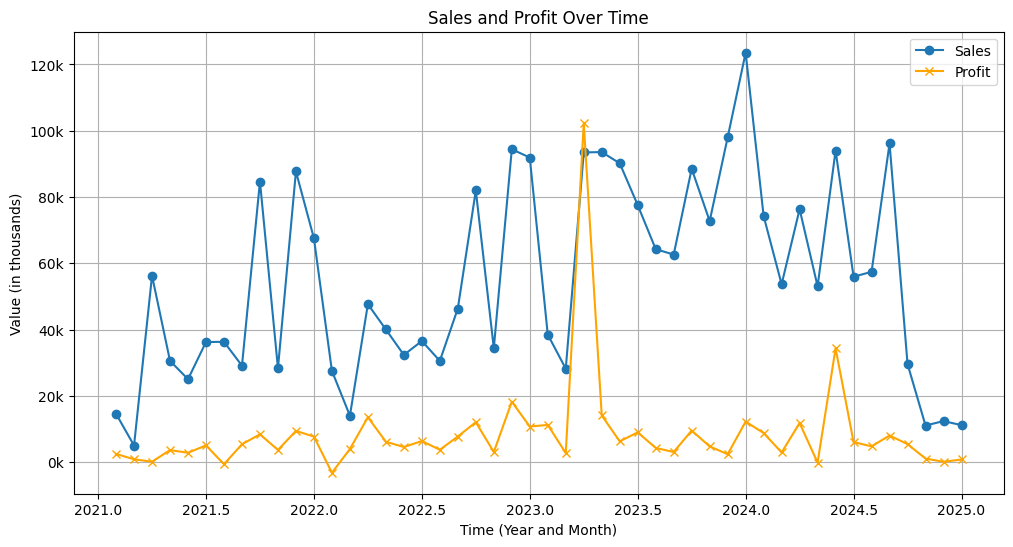

In [ ]:
# Extracting 'Year' and 'Month'
df_total['Year'] = pd.to_datetime(df_total['Order Date']).dt.year
df_total['Month'] = pd.to_datetime(df_total['Order Date']).dt.month

# Grouping by 'Year' and 'Month' and summing the 'Sales' and 'Profit'
monthly_data = df_total.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Creating the plot
plt.figure(figsize=(12, 6))
time = monthly_data['Year'] + monthly_data['Month'] / 12
plt.plot(time, monthly_data['Sales'], label='Sales', marker='o')
plt.plot(time, monthly_data['Profit'], label='Profit', marker='x', color='orange')

# Customizing plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Sales and Profit Over Time')
plt.legend()
plt.grid(True)

# Reformatting y-axis values in thousands (like 10k instead of 10,000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))
plt.show()

This graph depicts the sum of all sales and profits across time, grouped in years and months. Notice that the profits never exceed the sales, except for in one case (between the dates 2023 and 2023.5), which we will have to examine further.

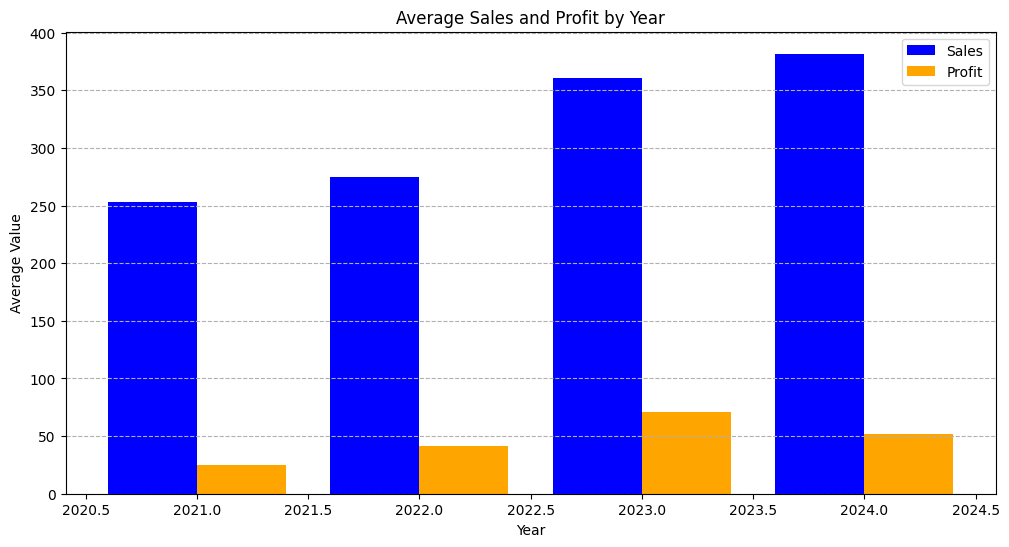

In [ ]:
# Calculating average sales and profits by year.
avg_sales_by_year = df_total.groupby('Year')['Sales'].mean()
avg_profit_by_year = df_total.groupby('Year')['Profit'].mean()

# Combined the data into a single DataFrame to make it more manageable
avg_data = pd.DataFrame({'Sales': avg_sales_by_year,'Profit': avg_profit_by_year}).reset_index()

# Creating the side-by plot
plt.figure(figsize=(12, 6))
bar_width = 0.4  # Width of each bar

# Create bar plots with offsets for side-by-side plot
plt.bar(avg_data['Year'] - bar_width / 2, avg_data['Sales'], width=bar_width, label='Sales', color='blue')
plt.bar(avg_data['Year'] + bar_width / 2, avg_data['Profit'], width=bar_width, label='Profit', color='orange')

# Customize plot
plt.title('Average Sales and Profit by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(axis='y', linestyle='--')

# Reformatting y-axis values in thousands
plt.show()

This bar graph extracts the sales and profits based on the year, and averages their values, displaying them side-by-side so that you can clearly see the relationship between the two values over time. Additionally, this graph gives a good view of the progression through the years of the sales and profits.

After looking at the datasets and the graph, it is evident that there's an error, with some values skewing the data such as outliers and unrealistic values. So, we must clean and filter the data for these errors and inconsistencies to properly examine the data, and make the requested predictions.

### Cleaning and Filtering the Data

First, we will make a copy of the 'df_total' variable that will now be our "cleaned and filtered" dataset.

In [ ]:
# Making copy of df_total for cleaning
df_clean = df_total.copy()

Next, if it is justifiable, we will remove any rows where the 'Profits' exceed the 'Sales', since profit can't realistically exceed sales.

In [ ]:
# Display observations where Profit > Sales
df_clean[df_clean['Profit'] > df_clean['Sales']]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
3963,2022-126347,2022-12-15,2022-12-20,Second Class,AJ-10945,Ashley Romero,Consumer,United States,Los Angeles,California,...,TEC-AC-10003063,Technology,Accessories,Micro Innovations USB RF Wireless Keyboard wit...,61.00,2,0.0,69.30,2022,12
4245,2023-166674,2023-03-04,2023-05-04,Second Class,RB-19360,Raymond Cooper,Consumer,United States,Auburn,New York,...,TEC-PH-10002365,Technology,Phones,Belkin Grip Candy Sheer Case / Cover for iPhon...,53.73,4,0.0,91585.94,2023,3
6609,2023-108210,2023-01-06,2023-02-06,Same Day,AT-10735,Annie Butler,Consumer,United States,Houston,Texas,...,TEC-PH-10002293,Technology,Phones,Anker 36W 4-Port USB Wall Charger Travel Power...,0.00,5,0.2,8019.99,2023,1


Looking at the first 'Product'/'Product ID', we have determined that the sale should be around $38.25/unit and profits to be around 5.265/unit, making this row (3963) an error. So, we can subsequently delete it.

In [ ]:
# Deleting row due to error
df_clean = df_clean.drop(3963, axis=0)

The following two rows (4245 and 6609), both for redundancy and logic, are rather self-explanatory and can be deleted even after examining it at face value. Although the profit for row 4245 can be fixed to '9.16', we will simply delete it since it won't harshly affect the overall dataset. Row 6609 is simply deleted, due to the profits being very high despite there being no sales.

In [ ]:
df_clean = df_clean.drop(4245, axis=0)

df_clean = df_clean.drop(6609, axis=0)

Now, we will look for any outliers and eliminate them, if justifiable. We will set the profit threshold to 3300 and -3300, as that is roughly three standard deviations (std= 1083.76) away from the mean.

In [ ]:
# Look for any outliers by filtering for profit below -3300
df_clean[df_clean["Profit"]<-3300]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
1942,2021-169019,2021-07-27,2021-07-31,Standard Class,LF-17185,Luke Phillips,Consumer,United States,San Antonio,Texas,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2279.93,8,0.8,-3787.04,2021,7
2666,2022-147830,2022-12-16,2022-12-19,First Class,NF-18385,Natalie Scott,Consumer,United States,Newark,Ohio,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,2195.99,2,0.7,-3695.99,2022,12
6107,2023-108196,2023-11-27,2023-04-12,Standard Class,CS-12505,Cindy Hall,Consumer,United States,Lancaster,Ohio,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,6884.98,5,0.7,-6619.78,2023,11
7129,2024-134845,2024-04-18,2024-04-24,Standard Class,SR-20425,Sharelle Howard,Home Office,United States,Louisville,Colorado,...,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,4079.98,5,0.7,-3501.98,2024,4


In [ ]:
# Check the product/product ID (row 1942) for trends
df_clean[df_clean["Product ID"]=="OFF-BI-10004995"]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
1377,2021-144414,2021-06-18,2021-06-22,Standard Class,GH-14425,Gary Ray,Consumer,United States,Seattle,Washington,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,3419.90,3,0.2,1085.99,2021,6
1942,2021-169019,2021-07-27,2021-07-31,Standard Class,LF-17185,Luke Phillips,Consumer,United States,San Antonio,Texas,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2279.93,8,0.8,-3787.04,2021,7
4209,2023-129714,2023-03-09,2023-05-09,First Class,AB-10060,Adam Schmidt,Home Office,United States,New York City,New York,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,6663.41,4,0.2,1419.68,2023,3
4448,2023-130946,2023-10-04,2023-04-14,Standard Class,ZC-21910,Zuschuss Edwards,Consumer,United States,Houston,Texas,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1665.85,4,0.8,-1856.50,2023,10
7711,2024-138289,2024-01-18,2024-01-20,Second Class,AR-10540,Andy Carter,Consumer,United States,Jackson,Michigan,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,8710.34,4,0.0,2579.35,2024,1


Initially, the Profit from 'row 1942' seemed low. However, after filtering for the other orders within the same Product ID, the profit appears to be correct as the trends stay consistent, and is only negative for the orders that have a heavy discount (80%). Even so, the negative profits aren't too egregious and follow the same proportions as the other orders, when comparing the sales and profit. So, we won't delete this row.

In [ ]:
# Check the product/product ID (row 2666, 6107) for trends
df_clean[df_clean["Product ID"]=="TEC-MA-10000418"]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
2666,2022-147830,2022-12-16,2022-12-19,First Class,NF-18385,Natalie Scott,Consumer,United States,Newark,Ohio,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,2195.99,2,0.7,-3695.99,2022,12
6107,2023-108196,2023-11-27,2023-04-12,Standard Class,CS-12505,Cindy Hall,Consumer,United States,Lancaster,Ohio,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,6884.98,5,0.7,-6619.78,2023,11
7297,2024-149881,2024-02-04,2024-04-04,First Class,NC-18535,Nick Campbell,Corporate,United States,San Francisco,California,...,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,7679.97,2,0.2,370.80,2024,2


For the next two rows (2666 and 6107), despite the rather low negative profit values of the supposed outlier, examining the other orders in this Product ID reveals consistencies between the low profits when compared with the sales, especially considering the discounts. So, we won't remove this supposed "outlier".

Finally, for the last row (7129) in the filtered search for profits below -3300, it also initially seems low. However, after a search for the same Product ID, the values stay consistent when comparing the profits with their respective sales, especially considering the discounts. So, we also won't remove this supposed "outlier". For redundancy purposes, I won't show this search since we had covered this in the previous case study (Practice 2), and because I have displayed similar searches for the previous two rows.

Now for the profits above 3300, we can implement the same process.

In [ ]:
# Look for any outliers by filtering for profit above 3300
df_clean[df_clean["Profit"]>3300]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
841,2021-116904,2021-09-24,2021-09-29,Standard Class,SC-20095,Sanjit Gonzalez,Consumer,United States,Minneapolis,Minnesota,...,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9894.10,5,0.0,4736.98,2021,9
2101,2022-145352,2022-03-17,2022-03-23,Standard Class,CM-12385,Christopher Morales,Consumer,United States,Atlanta,Georgia,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04,5,0.0,4448.46,2022,3
5833,2023-118689,2023-04-10,2023-11-10,Standard Class,TC-20980,Tamara Lewis,Corporate,United States,Lafayette,Indiana,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,26774.92,5,0.0,8425.18,2023,4
6445,2023-117121,2023-12-19,2023-12-23,Standard Class,AB-10105,Adrian Martinez,Consumer,United States,Detroit,Michigan,...,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,15135.89,13,0.0,4961.21,2023,12
7995,2024-140151,2024-03-24,2024-03-26,First Class,RB-19360,Raymond Cooper,Consumer,United States,Seattle,Washington,...,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,22399.94,4,0.0,6921.58,2024,3
8213,2024-151855,2024-05-28,2024-04-06,Standard Class,BW-11110,Bart Weaver,Corporate,United States,Greensboro,North Carolina,...,TEC-AC-10002380,Technology,Accessories,Sony 64GB Class 10 Micro SDHC R40 Memory Card,43507.20,3,0.2,27980.10,2024,5


For the first five rows, they appear correct and consistent with the other orders within the Product ID, also noting that some of them are expensive products (Canon Advanced Copier), and factoring in the absence of a discount. However, for the last row (8213), the value for profit seems off and unrealistically high. Since the product is only a memory card, which isn't too expensive, we will assume the value is inflated, subsequently removing this row.

In [ ]:
df_clean = df_clean.drop(8213, axis=0)

Next, we can filter for the discounts and check if any have a discount value of greater than or equal to 1 (100% off), or less than 0, since a discount can only be within this range.

In [ ]:
# Filter for discounts greater than or equal to 100%
df_clean[df_clean["Discount"]>=1]

# Filter for discounts less than 0%
df_clean[df_clean["Discount"]<0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month


With the data being effectively cleaned and filtered, we can check for one more aspect. We will filter out the data present that is past Quarter 3 of 2024(Aug 30, 2024), since we will be predicting the metrics for Quarter 4 of 2024 in the following steps as we build our models.

In [ ]:
# Convert 'Order Date' to datetime
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

# Create the cutoff date
cutoff_date = pd.to_datetime('2024-08-30')

# Filter out rows with dates after the cutoff
df_clean = df_clean[df_clean['Order Date'] <= cutoff_date]

Now, our data is effectively cleaned and filtered, and is ready for further examination and implementation, as we can now move on with fulfilling the request and making our predictions for Quarter 4.

Quickly, we will display a visualization of the fully-cleaned dataset for visual reference.

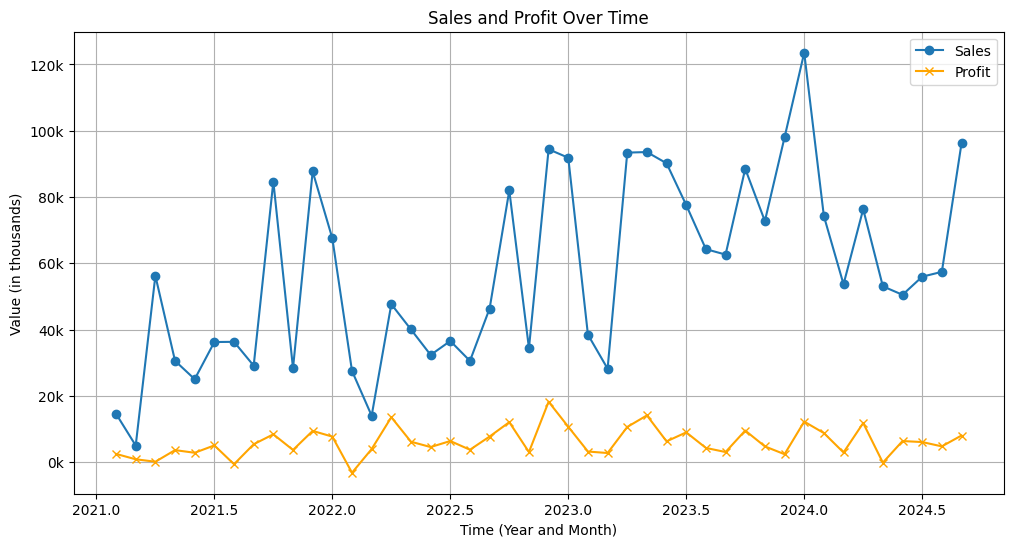

In [ ]:
# Extracting 'Year' and 'Month'
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month

# Grouping by 'Year' and 'Month' and summing the 'Sales' and 'Profit'
monthly_data = df_clean.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Creating the plot
plt.figure(figsize=(12, 6))
time = monthly_data['Year'] + monthly_data['Month'] / 12
plt.plot(time, monthly_data['Sales'], label='Sales', marker='o')
plt.plot(time, monthly_data['Profit'], label='Profit', marker='x', color='orange')

# Customizing plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Sales and Profit Over Time')
plt.legend()
plt.grid(True)

# Reformatting y-axis values in thousands (like 10k instead of 10,000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))
plt.show()

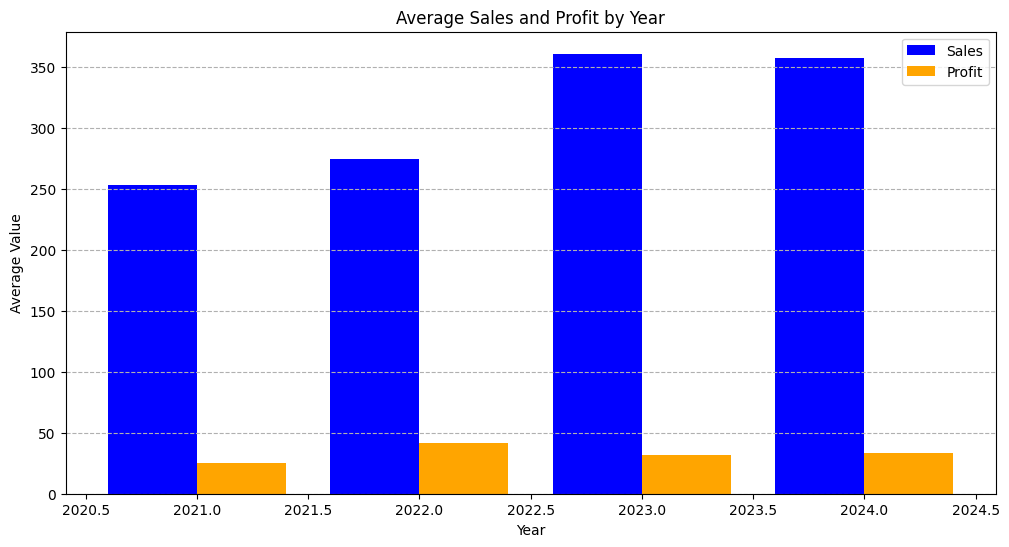

In [ ]:
# Calculating average sales and profits by year.
avg_sales_by_year = df_clean.groupby('Year')['Sales'].mean()
avg_profit_by_year = df_clean.groupby('Year')['Profit'].mean()

# Combined the data into a single DataFrame to make it more manageable
avg_data = pd.DataFrame({'Sales': avg_sales_by_year,'Profit': avg_profit_by_year}).reset_index()

# Creating the side-by plot
plt.figure(figsize=(12, 6))
bar_width = 0.4  # Width of each bar

# Create bar plots with offsets for side-by-side plot
plt.bar(avg_data['Year'] - bar_width / 2, avg_data['Sales'], width=bar_width, label='Sales', color='blue')
plt.bar(avg_data['Year'] + bar_width / 2, avg_data['Profit'], width=bar_width, label='Profit', color='orange')

# Customize plot
plt.title('Average Sales and Profit by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(axis='y', linestyle='--')

# Reformatting y-axis values in thousands
plt.show()

Now, you can see that the previous error in the data is gone from this graph, as the data is now cleaned, filtered, and streamlined for further examination. We can also note from the bar graph that after fixing the data, the "true" trend of our average sales for the latter half of 2023 and beyond is revealed, which is decreasing slightly. This will come up later on in our case study as well.

## Step 4: Looking for Patterns and Model Creation

### Looking for Patterns

As we move on to our predicting phase and prescriptive analytics, we must first utilize descriptive analytics to look and identify seasonal patterns within our data.

The code below creates a new DataFrame called 'df_monthly_sales', which is grouped by months and sums up the sales, simulataneously scaling the sales to be represented in thousands of dollars.

In [ ]:
# Ensure 'Order Date' is in datetime format
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

# Extract 'Year' and 'Month' as integers
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month

# Group by 'Year' and 'Month' and sum the sales
df_monthly_sales = (
    df_clean.groupby(['Year', 'Month'])['Sales']
    .sum()
    .reset_index()
)

# Scale 'Sales' to '$k Sales'
df_monthly_sales['$k Sales'] = df_monthly_sales['Sales'] / 1000

# Display the result
print(df_monthly_sales.head())

   Year  Month     Sales  $k Sales
0  2021      1  14601.70  14.60170
1  2021      2   5036.66   5.03666
2  2021      3  56256.91  56.25691
3  2021      4  30578.87  30.57887
4  2021      5  25047.73  25.04773


Now, we can utilize this new DataFrame and create several graphs displaying trends, seasonal patterns, and residuals, based on the monthly sales.

<Figure size 1200x800 with 0 Axes>

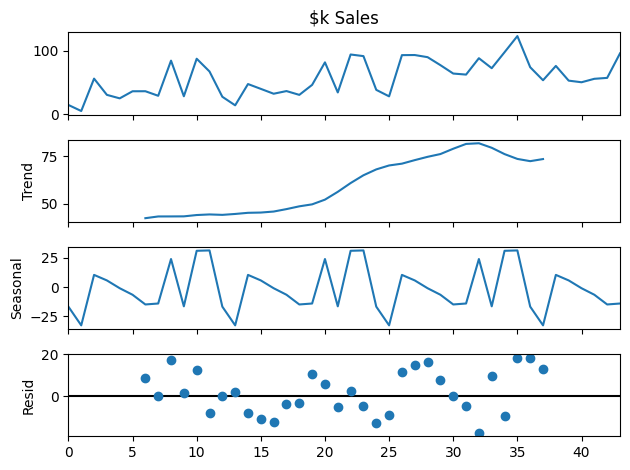

In [ ]:
# Decompose the time series to identify seasonal patterns
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df_monthly_sales' is your DataFrame with 'Month' and 'Sales' columns
# Assuming yearly seasonality
result = seasonal_decompose(df_monthly_sales['$k Sales'], model='additive', period=12)

# Plot the decomposition components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

Although we have studied and examined these type of trends in the previous case study (Practice 2), we can examine them further now.

From the first graph depicting our observed components (raw time series data), we can look for general patterns and trends, like ups/downs and fluctuations. The graph does fluctuate at times, but it happens in intervals/patterns, eventually becoming more stable towards Quarter 4. This can be a result from the changes made in 2023 that were highlighted in our previous case study (Practice 2).

For our second graph depicting the trend component, it shows the long-term movement in the data after removing seasonal and irregular components. This highlights whether the '$k Sales' are increasing, decreasing, or stable over time. As we can see, the amount of sales steadily increases through 2023 to 2024, before decreasing slightly towards the end of 2024. This shows us that something is causing our sales to decrease slightly starting in the latter half of 2024. We can back this up by looking at the two graphs we visualized earlier in this case study.

For the third graph, we take a look at the seasonal components that shows repeating patterns in the data at regular intervals, which can shed light on the effects of seasonality (such as higher sales during holiday seasons). In our graph, we can see that seasonality does affect our sales, with much higher peaks during the end of the year (possibly Thanksgiving and Christmas time), and lower troughs during other times (such as post-holiday).

Finally, for the residual components graph, it shows irregular/random fluctuations (after removing trend and seasonal components), reflecting unpredictability in the data. From the graph, there are some spikes that could result from randomness or outliers, but nothing too egregious.

Based on our examinations of trends and patterns, we can expect the sales (and the profits) to increase for the last Quarter of 2024, since it will be around the holidays (seasonality).

### Model Creation

Now that we have looked for and analyzed different patterns, we can finally start with our model creation.

Based on the required request for predicting total sales and profit for Quarter 4 of 2024, we can create and utilize two different models.   

#### Linear Regression Model

First, we will make a **Linear Regression Model**. We chose this rather common technique primarily due to its simplicity. As its biggest advantage, the linearity of Linear Regression allows the process to be simple and easy to understand/interpret.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Group by month and year to get sum of total sales for each month in df_clean
monthly_sales = df_clean.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_profit = df_clean.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Prepare the data for the model
X_sales = monthly_sales[['Year', 'Month']].values
y_sales = monthly_sales['Sales'].values

X_profit = monthly_profit[['Year', 'Month']].values
y_profit = monthly_profit['Profit'].values

# Split the data into training and testing sets, keeping order, 20% test size
X_sales_train, X_sales_test, y_sales_train, y_sales_test = train_test_split(X_sales, y_sales, test_size=0.2, shuffle=False, random_state=42)
X_profit_train, X_profit_test, y_profit_train, y_profit_test = train_test_split(X_profit, y_profit, test_size=0.2, shuffle=False, random_state=42)

# Train the model for Sales
model_sales = LinearRegression()
model_sales.fit(X_sales_train, y_sales_train)

# Train the model for Profit
model_profit = LinearRegression()
model_profit.fit(X_profit_train, y_profit_train)

# Make predictions on the test set for Sales
y_pred_sales = model_sales.predict(X_sales_test)

# Make predictions on the test set for Profit
y_pred_profit = model_profit.predict(X_profit_test)

# Evaluate the model for Sales
rmse_sales_lr = np.sqrt(mean_squared_error(y_sales_test, y_pred_sales))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Sales: {rmse_sales_lr}")

# Evaluate the model for Profit
rmse_profit_lr = np.sqrt(mean_squared_error(y_profit_test, y_pred_profit))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Profit: {rmse_profit_lr}")

# Predict total sales and profit for the next 4 months of 2024
future_months = [[2024, 9], [2024, 10], [2024, 11], [2024, 12]]
future_sales = model_sales.predict(future_months)
future_profit = model_profit.predict(future_months)

# Create a DataFrame to display the results
linear_projection_df = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Month': [9, 10, 11, 12],
    'Projected Sales': future_sales,
    'Projected Profit': future_profit
})
# Display all data series, including the projection for the next 4 months of 2024
print("\nLinear Regression Sales and Profit Projection for Next 4 Months of 2024:")
linear_projection_df

Root Mean Squared Error (RMSE) for Linear Regression Model Sales: 22667.989637927425
Root Mean Squared Error (RMSE) for Linear Regression Model Profit: 3820.090890151686

Linear Regression Sales and Profit Projection for Next 4 Months of 2024:


,Year,Month,Projected Sales,Projected Profit
0,2024,9,100457.388050,9824.937718
1,2024,10,105131.793334,10317.063520
2,2024,11,109806.198618,10809.189322
3,2024,12,114480.603903,11301.315124


In the above code, we have a Linear Regression projection of sales and profits for the **overall** dataset, showing the Root Mean Squared Errors (RMSE) as well. The RMSE, one of the main performance indicators of a regression model, measures the average difference between the model-predicted values and the actual values.

To go along with these numerical metrics, we can display a visual representation of the Linear Regression model's projections for Quarter 4 sales and profit in 2024.

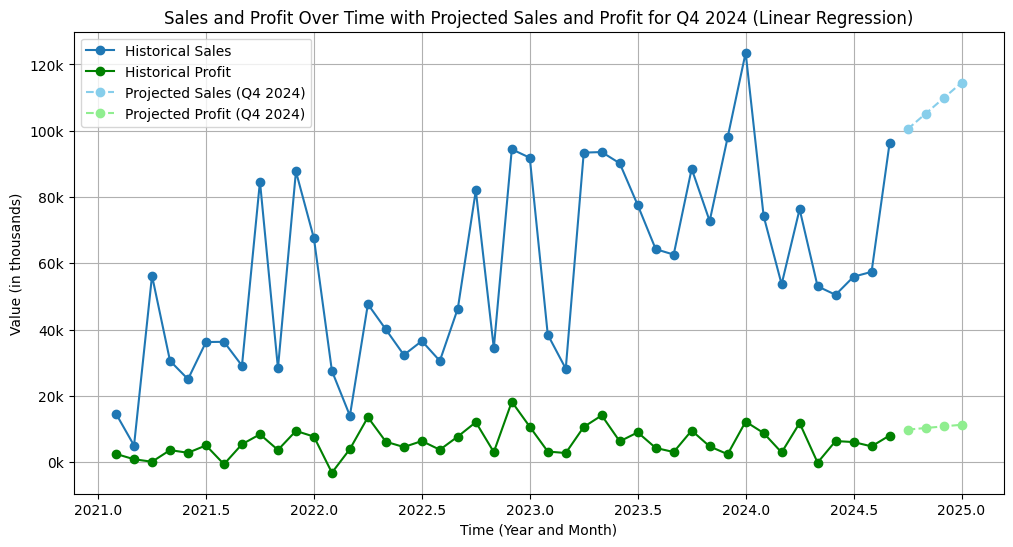

In [ ]:
import matplotlib.pyplot as plt

# Extracting 'Year' and 'Month' from historical data
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total sales and profit for each month
monthly_data = df_clean.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
sales = monthly_data['Sales']
profit = monthly_data['Profit']

# Extract projected sales and profit data
projected_time = linear_projection_df['Year'] + linear_projection_df['Month'] / 12
projected_sales = linear_projection_df['Projected Sales']
projected_profit = linear_projection_df['Projected Profit']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical sales and profit
plt.plot(time, sales, label='Historical Sales', marker='o')
plt.plot(time, profit, label='Historical Profit', marker='o', color='green')

# Plot projected sales for Q4 2024
plt.plot(projected_time, projected_sales, label='Projected Sales (Q4 2024)', marker='o', linestyle='--', color='skyblue')
plt.plot(projected_time, projected_profit, label='Projected Profit (Q4 2024)', marker='o', linestyle='--', color='lightgreen')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Sales and Profit Over Time with Projected Sales and Profit for Q4 2024 (Linear Regression)')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

From the graph, we can see the trajectory that is predicted by our model for both sales and profit, both being predicted for an increase in Q4. In particular, the sales are predicted to increase from around 98k to around 117k during Q4, definitely a notable increase.

Looking at the overall Linear Regression RMSE for sales and profits, they are relatively high, but we must look in depth at each category to provide a better understanding of the accuracy of the prediction that our model has given us. Let's take a look at the metrics for the 'Furniture' category.

In [ ]:
# Define the category you want to filter by
furniture_cat = "Furniture"  # Change this to the category you want

# Filter df_clean to include only rows with the selected category
filtered_furn = df_clean[df_clean['Category'] == furniture_cat]

# Group by 'Year' and 'Month' to get sum of total sales and profit for each month
monthly_sales_furn = filtered_furn.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_profit_furn = filtered_furn.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Prepare the data for the model
X_sales = monthly_sales_furn[['Year', 'Month']].values
y_sales = monthly_sales_furn['Sales'].values

X_profit = monthly_profit_furn[['Year', 'Month']].values
y_profit = monthly_profit_furn['Profit'].values

# Split the data into training and testing sets, keeping order, 20% test size
X_sales_train, X_sales_test, y_sales_train, y_sales_test = train_test_split(X_sales, y_sales, test_size=0.2, shuffle=False, random_state=42)
X_profit_train, X_profit_test, y_profit_train, y_profit_test = train_test_split(X_profit, y_profit, test_size=0.2, shuffle=False, random_state=42)

# Train the model for Sales
model_sales = LinearRegression()
model_sales.fit(X_sales_train, y_sales_train)

# Train the model for Profit
model_profit = LinearRegression()
model_profit.fit(X_profit_train, y_profit_train)

# Make predictions on the test set for Sales
y_pred_sales = model_sales.predict(X_sales_test)

# Make predictions on the test set for Profit
y_pred_profit = model_profit.predict(X_profit_test)

# Evaluate the model for Sales
rmse_sales_lr = np.sqrt(mean_squared_error(y_sales_test, y_pred_sales))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Sales in {furniture_cat}: {rmse_sales_lr}")

# Evaluate the model for Profit
rmse_profit_lr = np.sqrt(mean_squared_error(y_profit_test, y_pred_profit))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Profit in {furniture_cat}: {rmse_profit_lr}")

# Predict total sales and profit for the next 4 months of 2024
future_months = [[2024, 9], [2024, 10], [2024, 11], [2024, 12]]
future_sales_furn = model_sales.predict(future_months)
future_profit_furn = model_profit.predict(future_months)

# Create a DataFrame to display the results
linear_projection_furn = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Month': [9, 10, 11, 12],
    'Projected Sales': future_sales_furn,
    'Projected Profit': future_profit_furn
})

# Display the projection for the next 4 months of 2024 for the selected category
print(f"\nLinear Regression Sales and Profit Projection for {furniture_cat} for Next 4 Months of 2024:")
linear_projection_furn

Root Mean Squared Error (RMSE) for Linear Regression Model Sales in Furniture: 9285.183070338619
Root Mean Squared Error (RMSE) for Linear Regression Model Profit in Furniture: 496.3178422535486

Linear Regression Sales and Profit Projection for Furniture for Next 4 Months of 2024:


,Year,Month,Projected Sales,Projected Profit
0,2024,9,34205.622349,915.164292
1,2024,10,36053.602467,1055.653468
2,2024,11,37901.582584,1196.142645
3,2024,12,39749.562702,1336.631822


Filtering the data for just the "Furniture" category, we can see the prediction metrics that our model has given us. The RMSE is significantly lower than it was when looking at the overall data, reflecting its greater success at predicting values compared to our actual values.

/tmp/ipython-input-34-910421534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_furn['Year'] = filtered_furn['Order Date'].dt.year
/tmp/ipython-input-34-910421534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_furn['Month'] = filtered_furn['Order Date'].dt.month


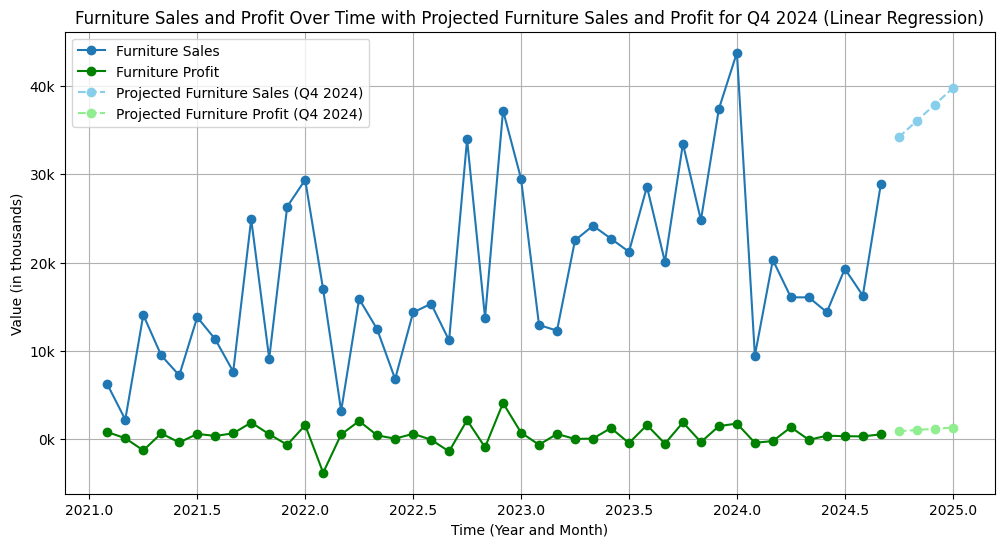

In [ ]:
# Extracting 'Year' and 'Month' from historical data
filtered_furn['Year'] = filtered_furn['Order Date'].dt.year
filtered_furn['Month'] = filtered_furn['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total sales and profit for each month
monthly_data = filtered_furn.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
sales = monthly_data['Sales']
profit = monthly_data['Profit']

# Extract projected sales and profit data
projected_time = linear_projection_furn['Year'] + linear_projection_furn['Month'] / 12
projected_sales = linear_projection_furn['Projected Sales']
projected_profit = linear_projection_furn['Projected Profit']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical sales and profit
plt.plot(time, sales, label='Furniture Sales', marker='o')
plt.plot(time, profit, label='Furniture Profit', marker='o', color='green')

# Plot projected sales for Q4 2024
plt.plot(projected_time, projected_sales, label='Projected Furniture Sales (Q4 2024)', marker='o', linestyle='--', color='skyblue')
plt.plot(projected_time, projected_profit, label='Projected Furniture Profit (Q4 2024)', marker='o', linestyle='--', color='lightgreen')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Furniture Sales and Profit Over Time with Projected Furniture Sales and Profit for Q4 2024 (Linear Regression)')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

Here, we can see the trend from the overall projections continue with the filtered data for furniture, where the sales and profits increasing during Q4.

Now, we can look at the "Technology" category.

In [ ]:
# Define the category you want to filter by
tech_cat = "Technology"  # Change this to the category you want

# Filter df_clean to include only rows with the selected category
filtered_tech = df_clean[df_clean['Category'] == tech_cat]

# Group by 'Year' and 'Month' to get sum of total sales and profit for each month
monthly_sales_tech = filtered_tech.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_profit_tech = filtered_tech.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Prepare the data for the model
X_sales = monthly_sales_tech[['Year', 'Month']].values
y_sales = monthly_sales_tech['Sales'].values

X_profit = monthly_profit_tech[['Year', 'Month']].values
y_profit = monthly_profit_tech['Profit'].values

# Split the data into training and testing sets, keeping order, 20% test size
X_sales_train, X_sales_test, y_sales_train, y_sales_test = train_test_split(X_sales, y_sales, test_size=0.2, shuffle=False, random_state=42)
X_profit_train, X_profit_test, y_profit_train, y_profit_test = train_test_split(X_profit, y_profit, test_size=0.2, shuffle=False, random_state=42)

# Train the model for Sales
model_sales = LinearRegression()
model_sales.fit(X_sales_train, y_sales_train)

# Train the model for Profit
model_profit = LinearRegression()
model_profit.fit(X_profit_train, y_profit_train)

# Make predictions on the test set for Sales
y_pred_sales = model_sales.predict(X_sales_test)

# Make predictions on the test set for Profit
y_pred_profit = model_profit.predict(X_profit_test)

# Evaluate the model for Sales
rmse_sales_lr = np.sqrt(mean_squared_error(y_sales_test, y_pred_sales))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Sales in {tech_cat}: {rmse_sales_lr}")

# Evaluate the model for Profit
rmse_profit_lr = np.sqrt(mean_squared_error(y_profit_test, y_pred_profit))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Profit in {tech_cat}: {rmse_profit_lr}")

# Predict total sales and profit for the next 4 months of 2024
future_months = [[2024, 9], [2024, 10], [2024, 11], [2024, 12]]
future_sales_tech = model_sales.predict(future_months)
future_profit_tech = model_profit.predict(future_months)

# Create a DataFrame to display the results
linear_projection_tech = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Month': [9, 10, 11, 12],
    'Projected Sales': future_sales_tech,
    'Projected Profit': future_profit_tech
})

# Display the projection for the next 4 months of 2024 for the selected category
print(f"\nLinear Regression Sales and Profit Projection for {tech_cat} for Next 4 Months of 2024:")
linear_projection_tech

Root Mean Squared Error (RMSE) for Linear Regression Model Sales in Technology: 10500.127666875933
Root Mean Squared Error (RMSE) for Linear Regression Model Profit in Technology: 3229.586753318953

Linear Regression Sales and Profit Projection for Technology for Next 4 Months of 2024:


,Year,Month,Projected Sales,Projected Profit
0,2024,9,37740.063771,5522.041205
1,2024,10,39392.497593,5772.895838
2,2024,11,41044.931416,6023.750471
3,2024,12,42697.365238,6274.605104


Here we can see that the predictive metrics for Technology is slightly higher than for Furniture, yet still lower than the overall metrics, which checks out. Again, it continues the trend of increasing during Q4, for both sales and profit. Of course, we can display a graph again to show the filtered data with its projections.

/tmp/ipython-input-36-3634544902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
/tmp/ipython-input-36-3634544902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Month'] = filtered_tech['Order Date'].dt.month


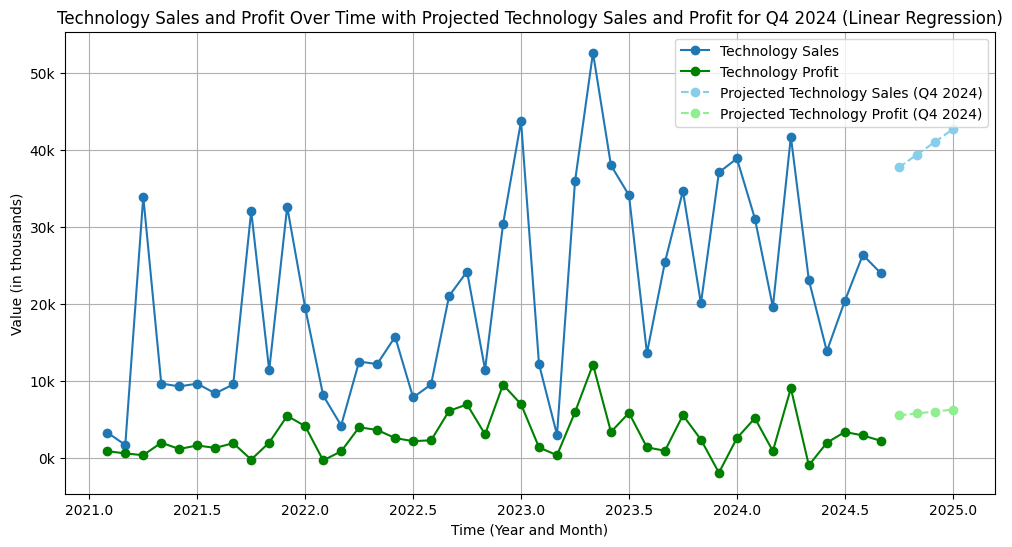

In [ ]:
# Extracting 'Year' and 'Month' from historical data
filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
filtered_tech['Month'] = filtered_tech['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total sales and profit for each month
monthly_data = filtered_tech.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
sales = monthly_data['Sales']
profit = monthly_data['Profit']

# Extract projected sales and profit data
projected_time = linear_projection_tech['Year'] + linear_projection_tech['Month'] / 12
projected_sales = linear_projection_tech['Projected Sales']
projected_profit = linear_projection_tech['Projected Profit']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical sales and profit
plt.plot(time, sales, label='Technology Sales', marker='o')
plt.plot(time, profit, label='Technology Profit', marker='o', color='green')

# Plot projected sales for Q4 2024
plt.plot(projected_time, projected_sales, label='Projected Technology Sales (Q4 2024)', marker='o', linestyle='--', color='skyblue')
plt.plot(projected_time, projected_profit, label='Projected Technology Profit (Q4 2024)', marker='o', linestyle='--', color='lightgreen')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Technology Sales and Profit Over Time with Projected Technology Sales and Profit for Q4 2024 (Linear Regression)')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

Similar to the one for Furniture, the projection that our model produces has the sales and profits increasing during Q4. However, we can note that our actual values, which ends at around 25k sales at the end of August 2024, is significantly lower than the starting value for the projection (25k vs ~38k). This could reflect a poor prediction from our model, but we will explore this when we introduce our second regression model later in the case study.

Next, we can filter again, this time for "Office Supplies".

In [ ]:
# Define the category you want to filter by
os_cat = "Office Supplies"  # Change this to the category you want

# Filter df_clean to include only rows with the selected category
filtered_os = df_clean[df_clean['Category'] == os_cat]

# Group by 'Year' and 'Month' to get sum of total sales and profit for each month
monthly_sales_os = filtered_os.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_profit_os = filtered_os.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Prepare the data for the model
X_sales = monthly_sales_os[['Year', 'Month']].values
y_sales = monthly_sales_os['Sales'].values

X_profit = monthly_profit_os[['Year', 'Month']].values
y_profit = monthly_profit_os['Profit'].values

# Split the data into training and testing sets, keeping order, 20% test size
X_sales_train, X_sales_test, y_sales_train, y_sales_test = train_test_split(X_sales, y_sales, test_size=0.2, shuffle=False, random_state=42)
X_profit_train, X_profit_test, y_profit_train, y_profit_test = train_test_split(X_profit, y_profit, test_size=0.2, shuffle=False, random_state=42)

# Train the model for Sales
model_sales = LinearRegression()
model_sales.fit(X_sales_train, y_sales_train)

# Train the model for Profit
model_profit = LinearRegression()
model_profit.fit(X_profit_train, y_profit_train)

# Make predictions on the test set for Sales
y_pred_sales = model_sales.predict(X_sales_test)

# Make predictions on the test set for Profit
y_pred_profit = model_profit.predict(X_profit_test)

# Evaluate the model for Sales
rmse_sales_lr = np.sqrt(mean_squared_error(y_sales_test, y_pred_sales))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Sales in {os_cat}: {rmse_sales_lr}")

# Evaluate the model for Profit
rmse_profit_lr = np.sqrt(mean_squared_error(y_profit_test, y_pred_profit))
print(f"Root Mean Squared Error (RMSE) for Linear Regression Model Profit in {os_cat}: {rmse_profit_lr}")

# Predict total sales and profit for the next 4 months of 2024
future_months = [[2024, 9], [2024, 10], [2024, 11], [2024, 12]]
future_sales_os = model_sales.predict(future_months)
future_profit_os = model_profit.predict(future_months)

# Create a DataFrame to display the results
linear_projection_os = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Month': [9, 10, 11, 12],
    'Projected Sales': future_sales_os,
    'Projected Profit': future_profit_os
})

# Display the projection for the next 4 months of 2024 for the selected category
print(f"\nLinear Regression Sales and Profit Projection for {os_cat} for Next 4 Months of 2024:")
linear_projection_os

Root Mean Squared Error (RMSE) for Linear Regression Model Sales in Office Supplies: 10443.362833161926
Root Mean Squared Error (RMSE) for Linear Regression Model Profit in Office Supplies: 2029.8713825329207

Linear Regression Sales and Profit Projection for Office Supplies for Next 4 Months of 2024:


,Year,Month,Projected Sales,Projected Profit
0,2024,9,28511.701930,3387.732222
1,2024,10,29685.693274,3488.514214
2,2024,11,30859.684618,3589.296206
3,2024,12,32033.675963,3690.078199


Again, the metrics for this category are similar to the previous two. In fact, the graph for this category is also similar to that of the previous two categories, so for redundancy purposes, we will refrain from showing it and move on to our second regression technique/model.



#### Random Forest Regression Model

For our second regression technique, we will be utilizing a **Random Forest Regressor**. We decided on this because of how Random Forest Regression reacts. It can handle a wide variety of data types as well as outliers and missing values, perfect for our dataset. Additionally, it generally has high accuracy due to its robustness against overfitting and how it reduces prediction variance by creating multiple estimates for the same prediction and selecting the most important features from a dataset.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Group by month and year to get sum of total sales and profit for each month in df_clean
monthly_sales = df_clean.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Prepare the data for the model
X = monthly_sales[['Year', 'Month']].values
y_sales = monthly_sales['Sales'].values
y_profit = monthly_sales['Profit'].values

# Split the data into training and testing sets, keeping order, 20% test size
X_train, X_test, y_sales_train, y_sales_test = train_test_split(X, y_sales, test_size=0.2, shuffle=False, random_state=42)
_, _, y_profit_train, y_profit_test = train_test_split(X, y_profit, test_size=0.2, shuffle=False, random_state=42)

# Train the Random Forest model for Sales
model_sales_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_sales_rf.fit(X_train, y_sales_train)

# Train the Random Forest model for Profit
model_profit_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_profit_rf.fit(X_train, y_profit_train)

# Make predictions on the test set for Sales
y_pred_sales_rf = model_sales_rf.predict(X_test)

# Make predictions on the test set for Profit
y_pred_profit_rf = model_profit_rf.predict(X_test)

# Evaluate the model for Sales
rmse_sales_rf = np.sqrt(mean_squared_error(y_sales_test, y_pred_sales_rf))
print(f"Root Mean Squared Error (RMSE) for Random Forest Model Sales: {rmse_sales_rf}")

# Evaluate the model for Profit
rmse_profit_rf = np.sqrt(mean_squared_error(y_profit_test, y_pred_profit_rf))
print(f"Root Mean Squared Error (RMSE) for Random Forest Model Profit: {rmse_profit_rf}")

# Predict total sales and profit for months 9-12 in 2024
future_months = [[2024, 9], [2024, 10], [2024, 11], [2024, 12]]
future_sales_rf = model_sales_rf.predict(future_months)
future_profit_rf = model_profit_rf.predict(future_months)

# Create a DataFrame to display the projections
rf_projection_df = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Month': [9, 10, 11, 12],
    'Projected Sales': future_sales_rf,
    'Projected Profit': future_profit_rf
})

print("\nRandom Forest Sales and Profit Projection for Next 4 Months of 2024:")
rf_projection_df

Root Mean Squared Error (RMSE) for Random Forest Model Sales: 29241.95069467507
Root Mean Squared Error (RMSE) for Random Forest Model Profit: 5394.177645285349

Random Forest Sales and Profit Projection for Next 4 Months of 2024:


,Year,Month,Projected Sales,Projected Profit
0,2024,9,81446.5514,8630.4896
1,2024,10,74374.2099,5466.5894
2,2024,11,92658.6657,6685.4724
3,2024,12,90661.5997,6335.4472


When examining this model's metrics, we can see that the RMSE for both sales and profits are actually higher than that of the Linear Regression model, possibly shedding light on which is the more effective model. However, we will explore this further later on in our case study, once we can compare both models together.

When it comes to projections, this model produces similar trends to that of the Linear Regression model, particularly a general increase during Q4. However, this model produces more variability and fluctuation with its prediction, with the sales and profits actually decreasing slightly during the last month of Q4 2024.

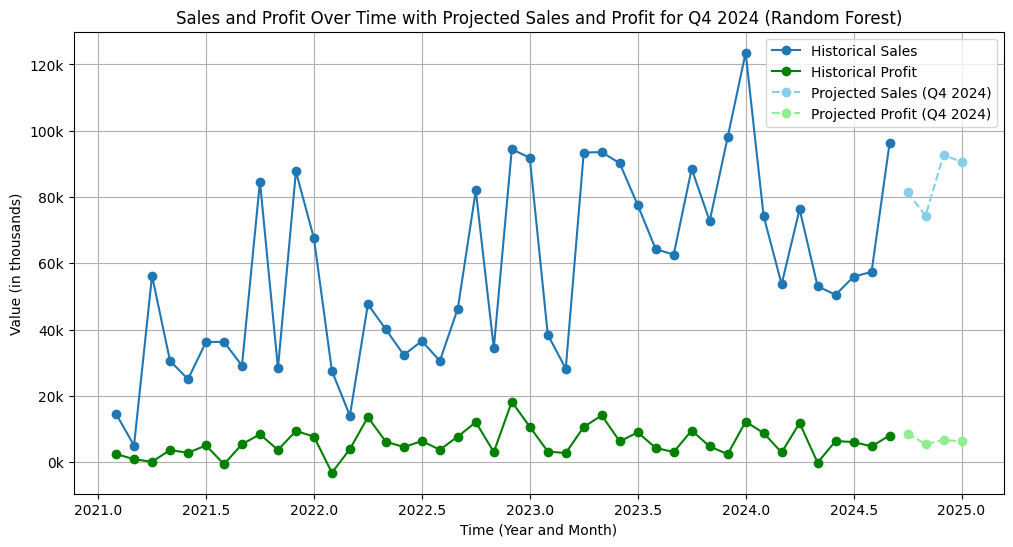

In [ ]:
import matplotlib.pyplot as plt

# Extracting 'Year' and 'Month' from historical data
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total sales and profit for each month
monthly_data = df_clean.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
sales = monthly_data['Sales']
profit = monthly_data['Profit']

# Extract projected sales data
projected_time = rf_projection_df['Year'] + rf_projection_df['Month'] / 12
projected_sales = rf_projection_df['Projected Sales']
projected_profit = rf_projection_df['Projected Profit']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical sales and profit
plt.plot(time, sales, label='Historical Sales', marker='o')
plt.plot(time, profit, label='Historical Profit', marker='o', color='green')

# Plot projected sales for Q4 2024
plt.plot(projected_time, projected_sales, label='Projected Sales (Q4 2024)', marker='o', linestyle='--', color='skyblue')
plt.plot(projected_time, projected_profit, label='Projected Profit (Q4 2024)', marker='o', linestyle='--', color='lightgreen')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Sales and Profit Over Time with Projected Sales and Profit for Q4 2024 (Random Forest)')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

The graph of this projection next to the actual values of sales and profits provides us with a great visual of how realistic the projection is based on trends and patterns with the historical (actual) data. Although we had previously noted that the decrease in sales and profit during the final month of Q4 may possibly be unrealistic, we can study the graph and see that during past years, there has been decreases during the final month(s) as well.

To further see how this model predicts our data, we will mainly filter the data for the "Technology" category, as this is the most prominent category of the three, and examine its metrics.

In [ ]:
# Define the category you want to filter by
tech_cat = "Technology"  # Change this to the category you want

# Filter df_clean to include only rows with the selected category
filtered_tech = df_clean[df_clean['Category'] == tech_cat]

# Group by month and year to get sum of total sales and profit for each month in filtered_tech
monthly_sales_tech_rf = filtered_tech.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Prepare the data for the model
X = monthly_sales_tech_rf[['Year', 'Month']].values
y_sales = monthly_sales_tech_rf['Sales'].values
y_profit = monthly_sales_tech_rf['Profit'].values

# Split the data into training and testing sets, keeping order, 20% test size
X_train, X_test, y_sales_train, y_sales_test = train_test_split(X, y_sales, test_size=0.2, shuffle=False, random_state=42)
_, _, y_profit_train, y_profit_test = train_test_split(X, y_profit, test_size=0.2, shuffle=False, random_state=42)

# Train the Random Forest model for Sales
model_sales_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_sales_rf.fit(X_train, y_sales_train)

# Train the Random Forest model for Profit
model_profit_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_profit_rf.fit(X_train, y_profit_train)

# Make predictions on the test set for Sales
y_pred_sales_rf = model_sales_rf.predict(X_test)

# Make predictions on the test set for Profit
y_pred_profit_rf = model_profit_rf.predict(X_test)

# Evaluate the model for Sales
rmse_sales_rf = np.sqrt(mean_squared_error(y_sales_test, y_pred_sales_rf))
print(f"Root Mean Squared Error (RMSE) for Random Forest Model Technology Sales: {rmse_sales_rf}")

# Evaluate the model for Profit
rmse_profit_rf = np.sqrt(mean_squared_error(y_profit_test, y_pred_profit_rf))
print(f"Root Mean Squared Error (RMSE) for Random Forest Model Technology Profit: {rmse_profit_rf}")

# Predict total sales and profit for months 9-12 in 2024
future_months = [[2024, 9], [2024, 10], [2024, 11], [2024, 12]]
future_sales_tech_rf = model_sales_rf.predict(future_months)
future_profit_tech_rf = model_profit_rf.predict(future_months)

# Create a DataFrame to display the projections
rf_projection_tech = pd.DataFrame({
    'Year': [2024, 2024, 2024, 2024],
    'Month': [9, 10, 11, 12],
    'Projected Sales': future_sales_tech_rf,
    'Projected Profit': future_profit_tech_rf
})

print("\nTechnology Sales and Profit Projection for Next 4 Months of 2024 (Random Forest):")
rf_projection_tech

Root Mean Squared Error (RMSE) for Random Forest Model Technology Sales: 15741.12324402268
Root Mean Squared Error (RMSE) for Random Forest Model Technology Profit: 4301.630949003073

Technology Sales and Profit Projection for Next 4 Months of 2024 (Random Forest):


,Year,Month,Projected Sales,Projected Profit
0,2024,9,31441.3576,4555.1963
1,2024,10,24860.0288,2883.7258
2,2024,11,33068.4149,1428.8067
3,2024,12,36301.2522,1969.0476


This time, though there is some fluctuation, the projected sales and profit increase instead of decreasing during the last month of Q4. This can be attributed to the increased sale of technological products during Christmas season. We can further review this on a graph.

/tmp/ipython-input-41-4003556573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
/tmp/ipython-input-41-4003556573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Month'] = filtered_tech['Order Date'].dt.month


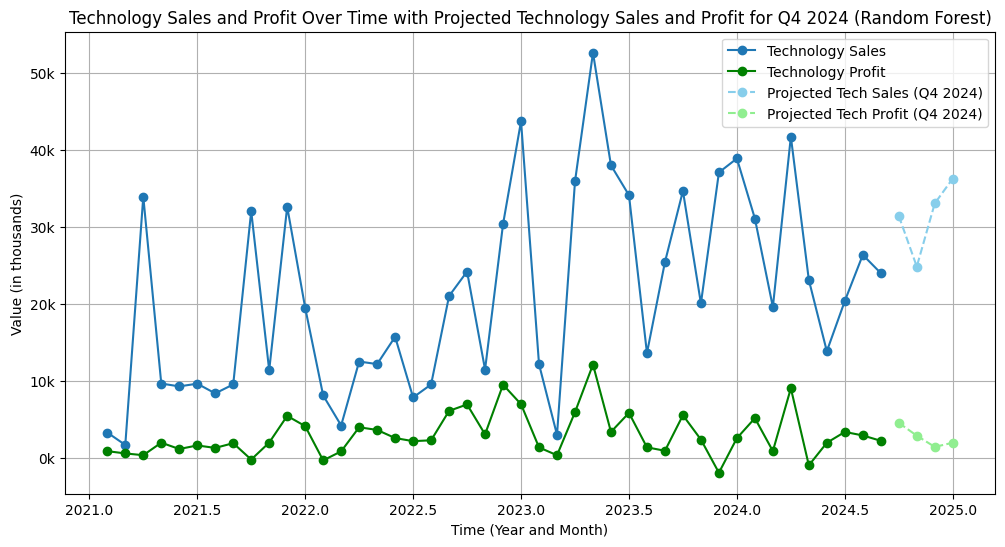

In [ ]:
# Extracting 'Year' and 'Month' from historical data
filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
filtered_tech['Month'] = filtered_tech['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total sales and profit for each month
monthly_data = filtered_tech.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
sales = monthly_data['Sales']
profit = monthly_data['Profit']

# Extract projected sales data
projected_time = rf_projection_tech['Year'] + rf_projection_tech['Month'] / 12
projected_sales = rf_projection_tech['Projected Sales']
projected_profit = rf_projection_tech['Projected Profit']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical sales and profit
plt.plot(time, sales, label='Technology Sales', marker='o')
plt.plot(time, profit, label='Technology Profit', marker='o', color='green')

# Plot projected sales for Q4 2024
plt.plot(projected_time, projected_sales, label='Projected Tech Sales (Q4 2024)', marker='o', linestyle='--', color='skyblue')
plt.plot(projected_time, projected_profit, label='Projected Tech Profit (Q4 2024)', marker='o', linestyle='--', color='lightgreen')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Technology Sales and Profit Over Time with Projected Technology Sales and Profit for Q4 2024 (Random Forest)')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

Here, we can clearly see some trends and patterns that can further explain the increase of sales and profits for Technology during the last month of the year (Q4). Looking at the graph, there are peaks in sales during the last month of the year for both 2023 and 2024, making this model's predictions more believable.

However, in order to truly observe the differences between the two models, we can depict them on the same graph.

## Step 5: Insights and Conclusion

#### Model Comparison

First, we will display the overall monthly sales, with both the Linear Regression and Random Forest model projections on the graph.

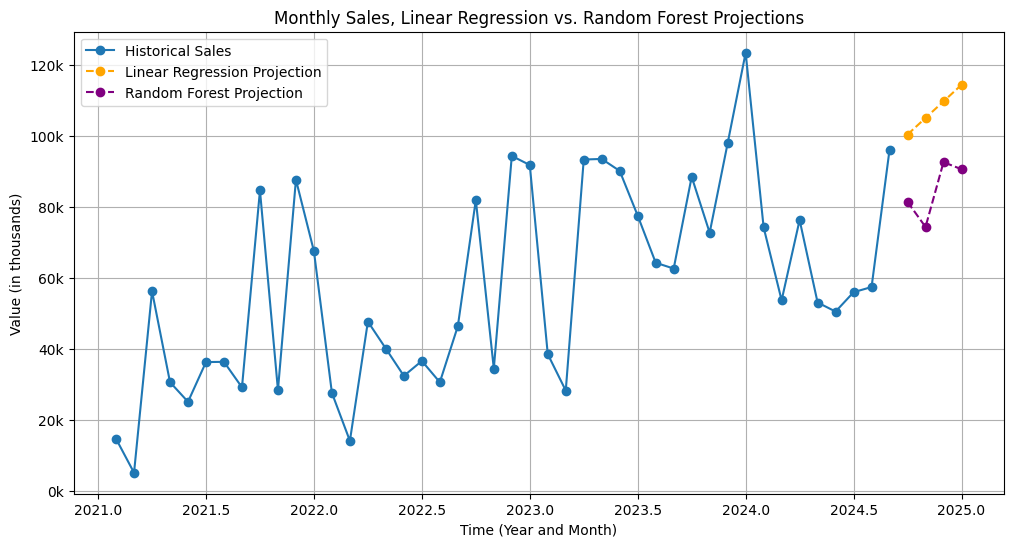

In [ ]:
# Extracting 'Year' and 'Month' from historical data
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total sales for each month
monthly_data = df_clean.groupby(['Year', 'Month'])[['Sales']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
sales = monthly_data['Sales']

# Extract projected sales data (Linear Regression)
projected_time = linear_projection_df['Year'] + linear_projection_df['Month'] / 12
projected_sales = linear_projection_df['Projected Sales']

# Extract projected sales data (Random Forest)
projected_time_rf = rf_projection_df['Year'] + rf_projection_df['Month'] / 12
projected_sales_rf = rf_projection_df['Projected Sales']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical sales
plt.plot(time, sales, label='Historical Sales', marker='o')

# Plot projected sales for Q4 2024 (Linear Regression)
plt.plot(projected_time, projected_sales, label='Linear Regression Projection', marker='o', linestyle='--', color='orange')

# Plot projected sales for Q4 2024 (Random Forest)
plt.plot(projected_time_rf, projected_sales_rf, label='Random Forest Projection', marker='o', linestyle='--', color='purple')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Monthly Sales, Linear Regression vs. Random Forest Projections')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

Here are monthly sales as projected by each of our models. As we can see, the linear regression model predicts higher sales than our random forest model. Later, we'll examine some metrics for each of these models and determine which one is more likely to be accurate.

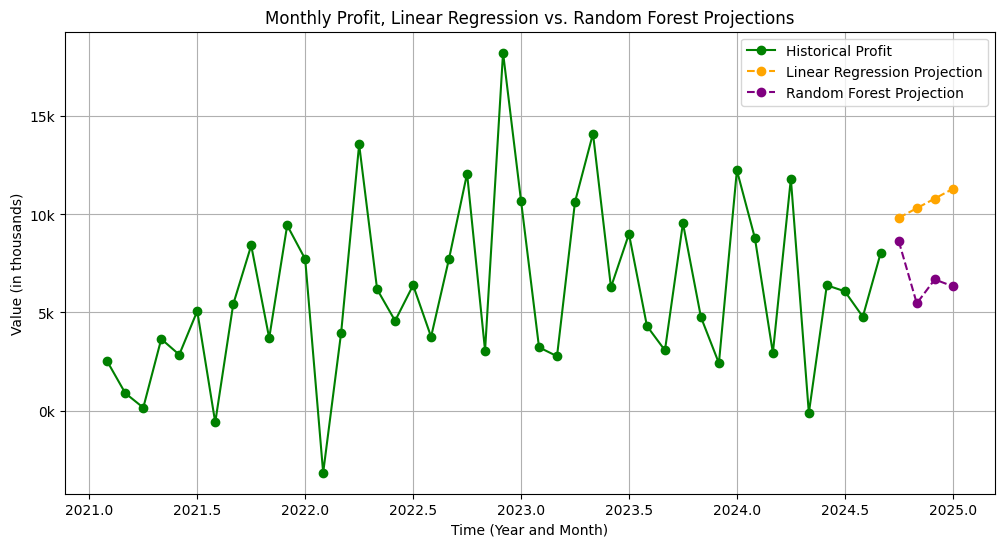

In [ ]:
# Extracting 'Year' and 'Month' from historical data
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total profit for each month
monthly_data = df_clean.groupby(['Year', 'Month'])[['Profit']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
profit = monthly_data['Profit']

# Extract projected profit data (Linear Regression)
projected_time = linear_projection_df['Year'] + linear_projection_df['Month'] / 12
projected_profit = linear_projection_df['Projected Profit']

# Extract projected profit data (Random Forest)
projected_time_rf = rf_projection_df['Year'] + rf_projection_df['Month'] / 12
projected_profit_rf = rf_projection_df['Projected Profit']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical profit
plt.plot(time, profit, label='Historical Profit', marker='o', color='green')

# Plot projected profit for Q4 2024 (Linear Regression)
plt.plot(projected_time, projected_profit, label='Linear Regression Projection', marker='o', linestyle='--', color='orange')

# Plot projected profit for Q4 2024 (Random Forest)
plt.plot(projected_time_rf, projected_profit_rf, label='Random Forest Projection', marker='o', linestyle='--', color='purple')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Monthly Profit, Linear Regression vs. Random Forest Projections')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

Here is the same graph as before except with profit now instead of sales. As we can observe, once again our linear regression model has higher projections for the real life values of 2024's Quarter 4 profits.

/tmp/ipython-input-44-1150198466.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
/tmp/ipython-input-44-1150198466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Month'] = filtered_tech['Order Date'].dt.month


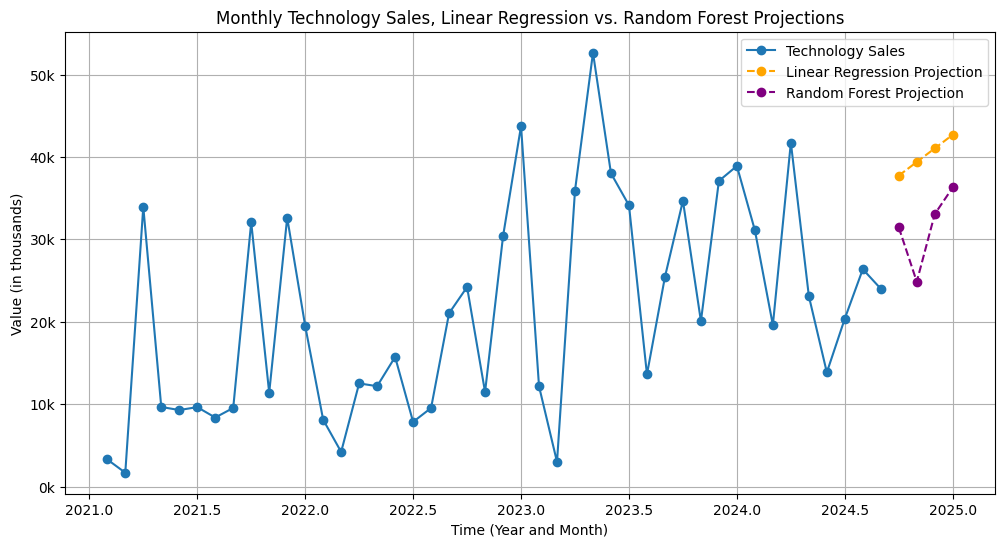

In [ ]:
# Define the category you want to filter by
tech_cat = "Technology"

# Filter df_clean to include only rows with the selected category
filtered_tech = df_clean[df_clean['Category'] == tech_cat]

# Extracting 'Year' and 'Month' from historical data
filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
filtered_tech['Month'] = filtered_tech['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total sales for each month
monthly_data = filtered_tech.groupby(['Year', 'Month'])[['Sales']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
sales = monthly_data['Sales']

# Extract projected sales data (Linear Regression)
projected_time_tech_lr = linear_projection_tech['Year'] + linear_projection_tech['Month'] / 12
projected_sales_tech_lr = linear_projection_tech['Projected Sales']

# Extract projected sales data (Random Forest)
projected_time_tech_rf = rf_projection_tech['Year'] + rf_projection_tech['Month'] / 12
projected_sales_tech_rf = rf_projection_tech['Projected Sales']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical sales
plt.plot(time, sales, label='Technology Sales', marker='o')

# Plot projected sales for Q4 2024 (Linear Regression)
plt.plot(projected_time_tech_lr, projected_sales_tech_lr, label='Linear Regression Projection', marker='o', linestyle='--', color='orange')

# Plot projected sales for Q4 2024 (Random Forest)
plt.plot(projected_time_tech_rf, projected_sales_tech_rf, label='Random Forest Projection', marker='o', linestyle='--', color='purple')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Monthly Technology Sales, Linear Regression vs. Random Forest Projections')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

This graph shows trends and model predictions for sales specifically pertaining to technology. We chose to visualize this category in particular as it sells well and should accurately show trends for all categories.

/tmp/ipython-input-45-2723775990.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
/tmp/ipython-input-45-2723775990.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tech['Month'] = filtered_tech['Order Date'].dt.month


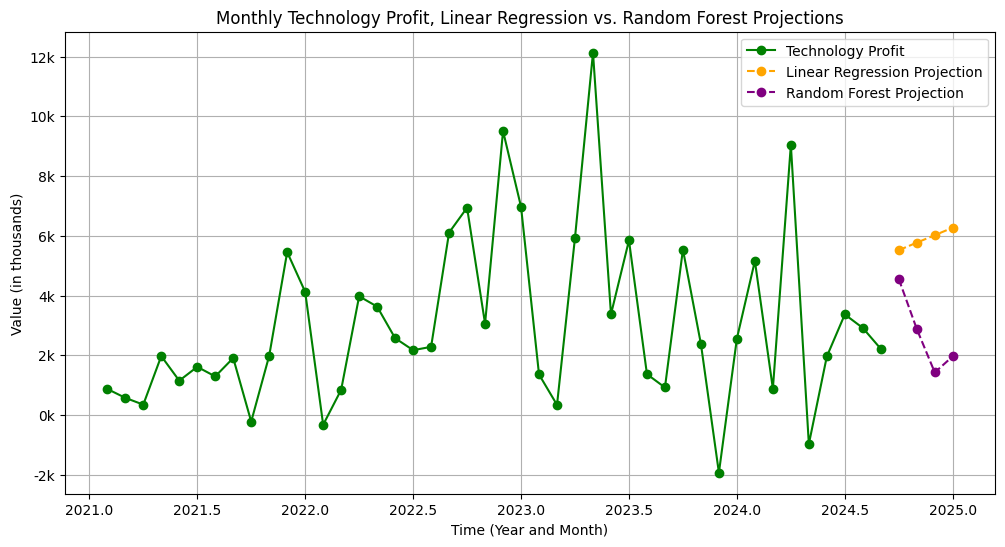

In [ ]:
# Define the category you want to filter by
tech_cat = "Technology"

# Filter df_clean to include only rows with the selected category
filtered_tech = df_clean[df_clean['Category'] == tech_cat]

# Extracting 'Year' and 'Month' from historical data
filtered_tech['Year'] = filtered_tech['Order Date'].dt.year
filtered_tech['Month'] = filtered_tech['Order Date'].dt.month

# Group by 'Year' and 'Month' to get total profit for each month
monthly_data = filtered_tech.groupby(['Year', 'Month'])[['Profit']].sum().reset_index()

# Extract historical data for plotting
time = monthly_data['Year'] + monthly_data['Month'] / 12
profit = monthly_data['Profit']

# Extract projected profit data (Linear Regression)
projected_time_tech_lr = linear_projection_tech['Year'] + linear_projection_tech['Month'] / 12
projected_profit_tech_lr = linear_projection_tech['Projected Profit']

# Extract projected profit data (Random Forest)
projected_time_tech_rf = rf_projection_tech['Year'] + rf_projection_tech['Month'] / 12
projected_profit_tech_rf = rf_projection_tech['Projected Profit']

# Create the combined plot
plt.figure(figsize=(12, 6))

# Plot historical profit
plt.plot(time, profit, label='Technology Profit', marker='o', color='green')

# Plot projected profit for Q4 2024 (Linear Regression)
plt.plot(projected_time_tech_lr, projected_profit_tech_lr, label='Linear Regression Projection', marker='o', linestyle='--', color='orange')

# Plot projected profit for Q4 2024 (Random Forest)
plt.plot(projected_time_tech_rf, projected_profit_tech_rf, label='Random Forest Projection', marker='o', linestyle='--', color='purple')

# Customize the plot
plt.xlabel('Time (Year and Month)')
plt.ylabel('Value (in thousands)')
plt.title('Monthly Technology Profit, Linear Regression vs. Random Forest Projections')
plt.legend()
plt.grid(True)

# Format y-axis values to display in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}k'))

# Show the combined plot
plt.show()

### Conclusion





With our two models, we want to be able to accurately predict our future sales and profit over the next couple months. However, they both came up with very different predictions, so how can we know which model to trust?

One way is by looking at our target metric, RMSE, which essentially tells us how close our model's predictions are to the real values that we've already observed.

* **Linear Regression Model**
  * Root Mean Squared Error (RMSE) for Sales: 22667.989637927425
  * Root Mean Squared Error (RMSE) for Profit: 3820.090890151686

* **Random Forest Model**
  * Root Mean Squared Error (RMSE) for Sales: 29241.95069467507
  * Root Mean Squared Error (RMSE) for Profit: 5394.177645285349

Given that our RMSE is signifcantly smaller for our linear regression model, we can say that this model is more likely giving us an accurate projection of sales in the 4th quarter of 2024. Beyond just using RMSE, we can also tell this just looking at visual trends over time. We know from examining our data that sales and profits increase significantly in the month of December (likely due to Christmas and holiday season), a trend which is reflected by the shape of our Linear Regression model and not our Random Forest.

# Request 2: Create a model to predict whether or not a customer will buy when accessing the company website

## Steps 1-3: Loading, Visualizing, and Cleaning/Filtering the Data

### Reading in our dataset

Before creating our model, we must prepare our data in a similar fashion to our previous dataset. This means loading our data in, visualizing and exploring it, and then cleaning it as well. It's worth noting that we have previously installed several packages in our first request's code so this is no longer necessary.

In [ ]:
# Reading in our dataset
df_acme = pd.read_csv('/content/ACME_Customers.csv')

# Getting a look at our data set's properties
df_acme.describe(include='all')

,CustomerID,Gender,AgeGroup,CategoryVisited,NumPagesViewed,DeviceUsed,ReferralSource,CartValue,PreferredPaymentMethod,DiscountApplied,DiscountAmount,PurchaseMade,Segment,YearsOfMembership,LoyaltyPoints,LoyaltyTier,State
count,20000,20000,20000,20000,20000.00000,20000,20000,20000.000000,20000,20000,20000.000000,20000,20000,20000.000000,20000.000000,20000,20000
unique,19997,2,6,3,NaN,4,4,NaN,4,2,NaN,2,3,NaN,NaN,4,6
top,VJ-60182,Male,25-34,Furniture,NaN,Laptop,Email,NaN,Credit Card,Yes,NaN,No,Corporate,NaN,NaN,Gold,New York
freq,2,10042,3465,6753,NaN,6997,5037,NaN,6688,15338,NaN,11858,6711,NaN,NaN,5111,3437
mean,NaN,NaN,NaN,NaN,10.05425,NaN,NaN,1043.902090,NaN,NaN,0.286925,NaN,NaN,5.504200,2350.393800,NaN,NaN
std,NaN,NaN,NaN,NaN,5.47980,NaN,NaN,521.023912,NaN,NaN,0.265927,NaN,NaN,2.866425,1361.216296,NaN,NaN
min,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,13.073600,NaN,NaN,0.000000,NaN,NaN,1.000000,100.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,652.809100,NaN,NaN,0.100000,NaN,NaN,3.000000,1268.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,10.00000,NaN,NaN,1030.538800,NaN,NaN,0.200000,NaN,NaN,5.000000,1997.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,15.00000,NaN,NaN,1397.122000,NaN,NaN,0.500000,NaN,NaN,8.000000,3519.000000,NaN,NaN


Looking at the summary statistics of our data is a good way to tell if anything is off with our data set and will need to be adjusted during the data cleaning/filtering process. At first glance, this dataset appears pretty clean already. It's also worth noting that we don't have any date variables that need to be converted.

### Visualizing our Data

Now, let's look at some charts and visualizations to get a better understanding of our data, as well as looking out for any irregularities or patterns in the data that we may have to consider.

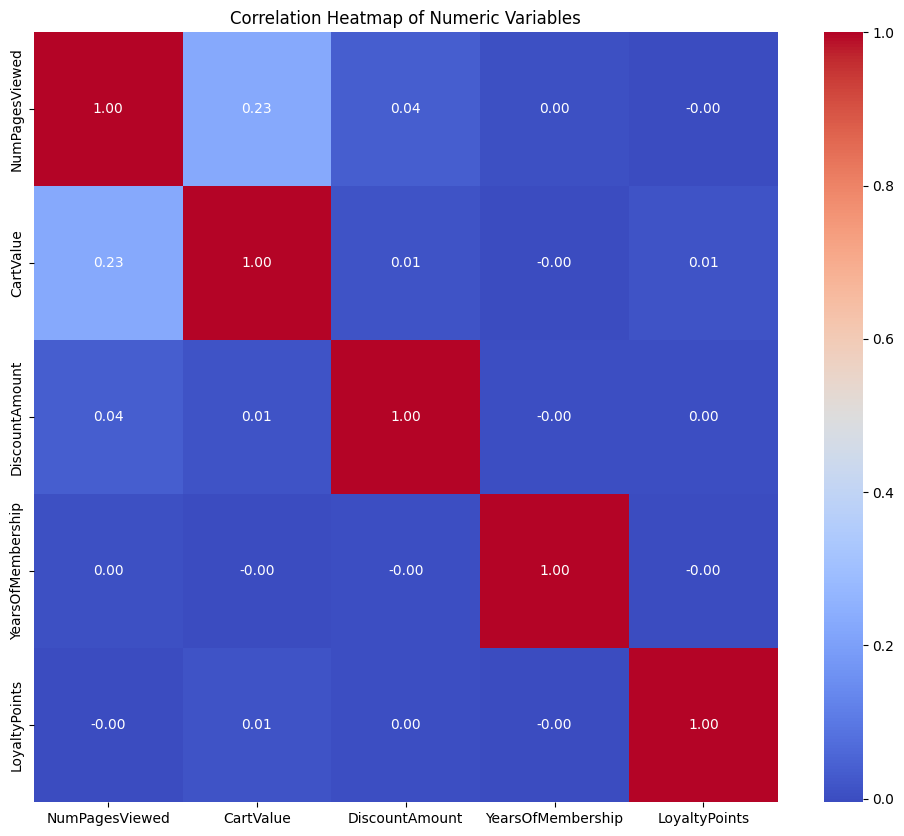

In [ ]:
# Selecting only numeric columns
df_numeric = df_acme.select_dtypes(include=np.number)

# Creating a correlation heatmap of these numeric columns using 'seaborn' package
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

As we can see from this heatmap, none of the numeric variables are correlated with each other to any sort of significant degree, meaning we can include them all in our model without any risk of overfitting.

Next, let's take a closer look at our model's target variable: PurchaseMade.

In order to do this in a way that gives us a bit more information, I'll be creating a variable that counts the total purchases by gender.

As we can see from our code above, out of the 20000 total observations 10042 are men so it is a relatively even split.

Looking at the difference between these demographics will give us a good idea of our total proportion of purchases versus non-purchase visits. It will also allow us to look at any possible correlation between gender and purchase.

In [ ]:
# Create a new column 'MalePurchase' that encodes a 1 if a male has a 'yes' in PurchaseMade
df_acme['MalePurchase'] = ((df_acme['Gender'] == 'Male') & (df_acme['PurchaseMade'] == 'Yes')).astype(int)

# Create a new column 'FemalePurchase' that encodes 1 for each 'yes' in PurchaseMade by a female
df_acme['FemalePurchase'] = ((df_acme['Gender'] == 'Female') & (df_acme['PurchaseMade'] == 'Yes')).astype(int)

df_acme.head()

,CustomerID,Gender,AgeGroup,CategoryVisited,NumPagesViewed,DeviceUsed,ReferralSource,CartValue,PreferredPaymentMethod,DiscountApplied,DiscountAmount,PurchaseMade,Segment,YearsOfMembership,LoyaltyPoints,LoyaltyTier,State,MalePurchase,FemalePurchase
0,AA-08870,Male,55-64,Furniture,6,Tablet,Direct,264.2371,PayPal,No,0.0,Yes,Home Office,5,1945,Silver,Florida,1,0
1,AA-12676,Male,65+,Home Supplies,7,Laptop,Direct,1596.3232,Credit Card,Yes,0.1,No,Home Office,6,1179,Platinum,California,0,0
2,AA-17187,Female,18-24,Home Supplies,15,Laptop,Search Engine,1491.0912,PayPal,Yes,0.3,No,Consumer,10,490,Gold,Texas,0,0
3,AA-17917,Female,18-24,Technology,4,Mobile,Social Media,177.1260,Debit Card,Yes,0.1,No,Home Office,7,2235,Gold,Ohio,0,0
4,AA-20050,Male,65+,Furniture,19,Laptop,Direct,1885.3756,Bank Transfer,No,0.0,Yes,Home Office,3,2844,Silver,Alabama,1,0


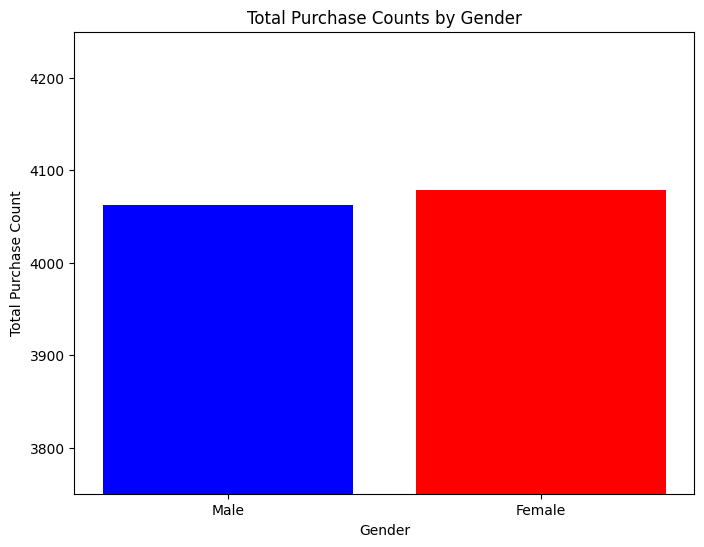

Total purchases by men: 4063
Total purchases by women: 4079


In [ ]:
# Total counts for 'MalePurchase' and 'FemalePurchase' columns
male_purchase_count = df_acme['MalePurchase'].sum()
female_purchase_count = df_acme['FemalePurchase'].sum()

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Male', 'Female'], [male_purchase_count, female_purchase_count], color=['blue', 'red'])
plt.title('Total Purchase Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Count')
plt.ylim(3750, 4250)
plt.show()

print(f"Total purchases by men: {male_purchase_count}")
print(f"Total purchases by women: {female_purchase_count}")

Clearly from this visual, there is actually no significant difference between the genders when it comes to purchasing, which does make sense, given that our product is for everyone.

We can also see that the total purchases made add up to 8142, giving us a total proportion of 0.407 of website visitors who end up purchasing a product.

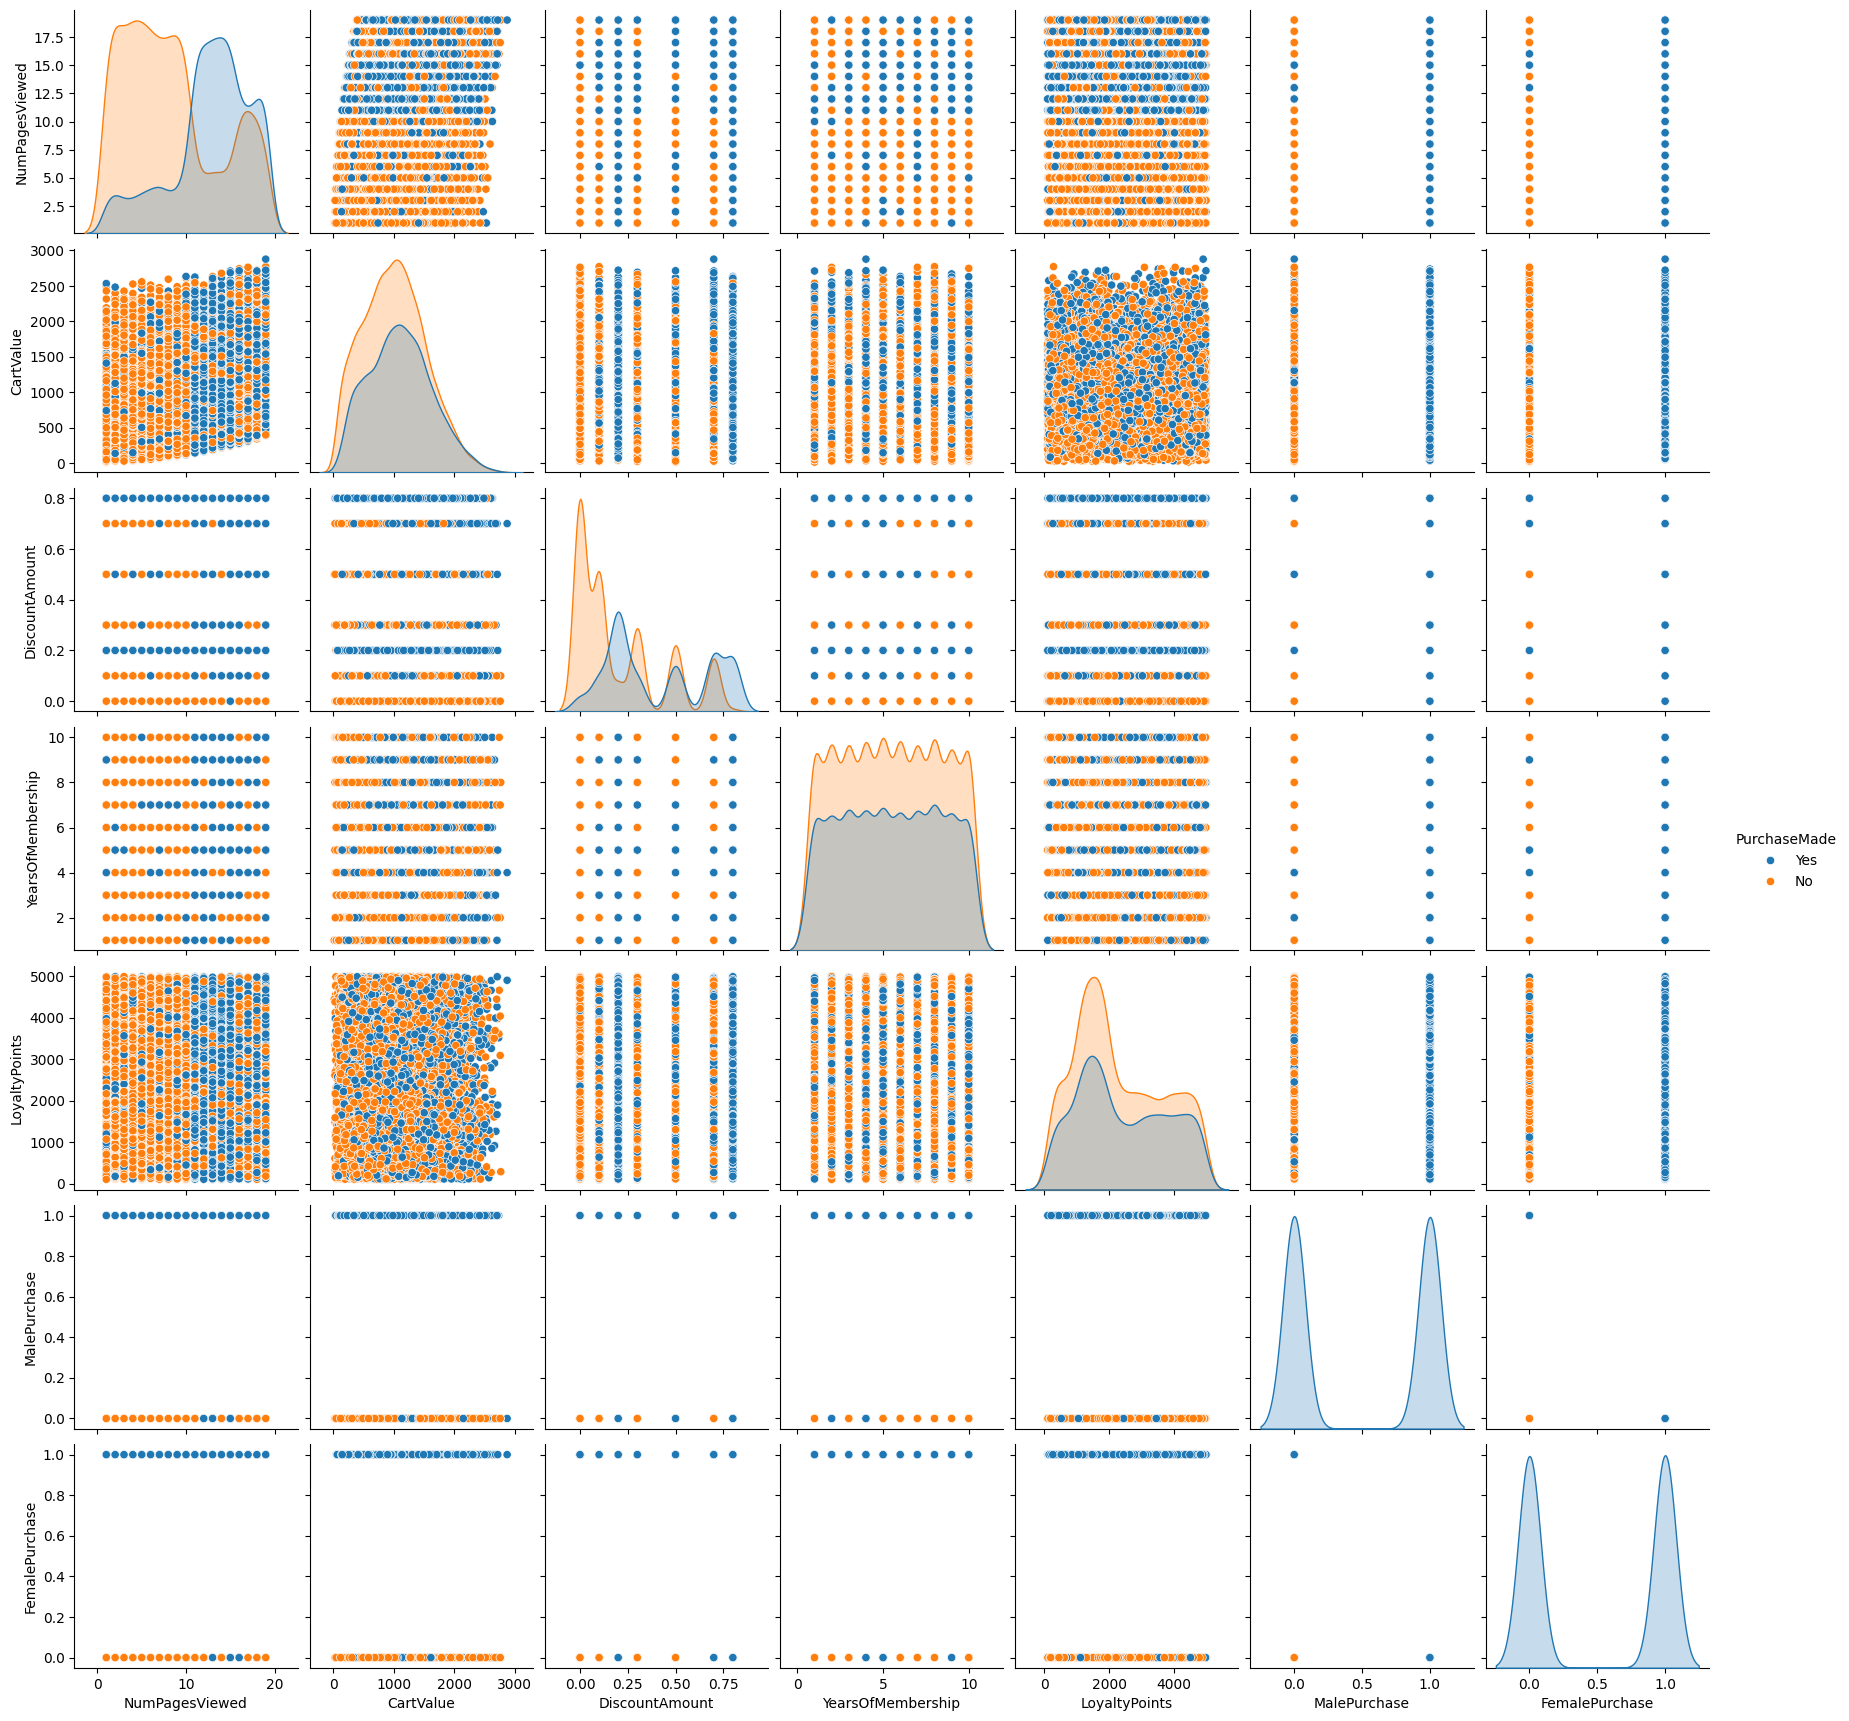

In [ ]:
sns.pairplot(df_acme, hue='PurchaseMade')
plt.show()

From these pairplots, we can see that the data actually looks quite clean. It is difficult to spot any irregularities in our data, and I feel quite confident that we are almost ready to model right away.

The only way we will need to prepare our data is by encoding the data into the proper types, most often done by creating dummy variables which essentially just means simplifying our data so that Python can more easily understand and build a model out of it.

But first, let's look at another visual just to be sure we have a normal dataset.

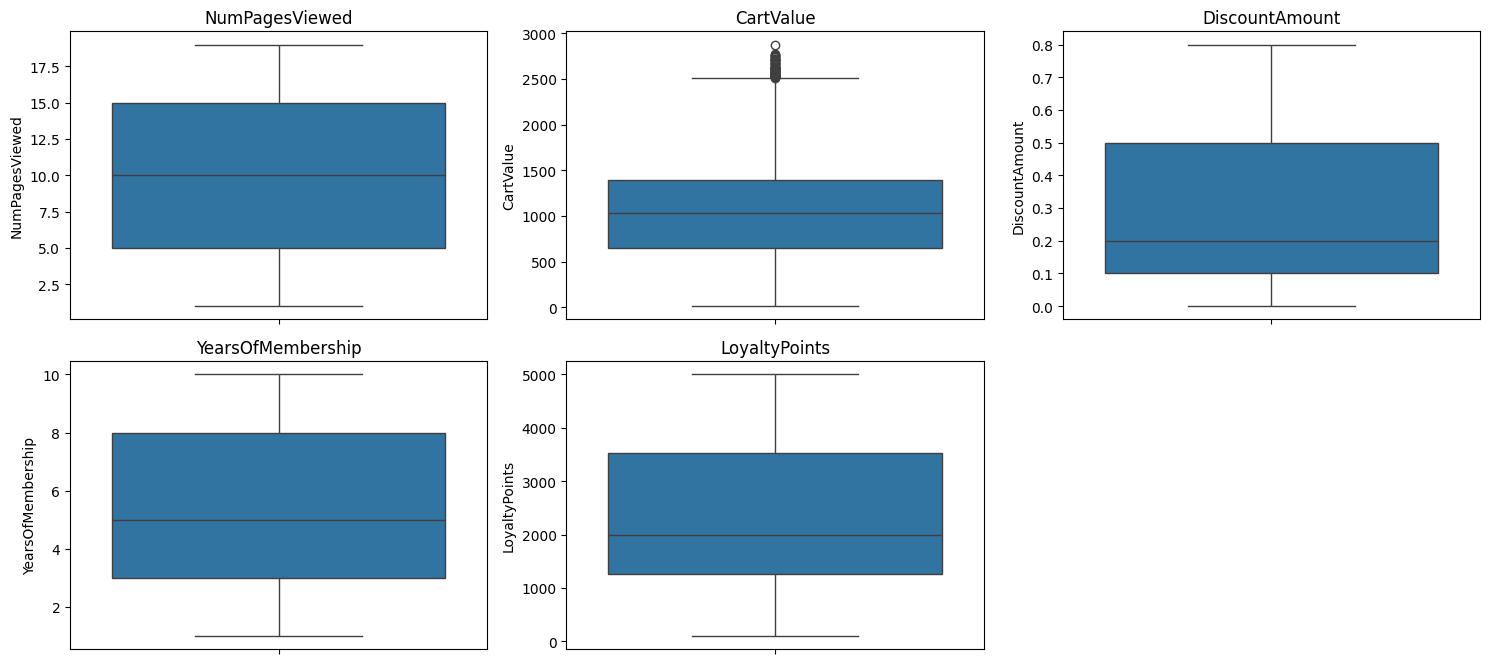

In [ ]:
# Selecting the numerical columns
numerical_cols = df_acme.select_dtypes(include=np.number).drop(['FemalePurchase', 'MalePurchase'], axis=1).columns

# Creating boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df_acme[col])
  plt.title(col)

plt.tight_layout()
plt.show()

We can observe from these boxplots that there may be some outliers in the CartValue column, so let's take a closer look at this column and see whether or not these outliers should concern us.

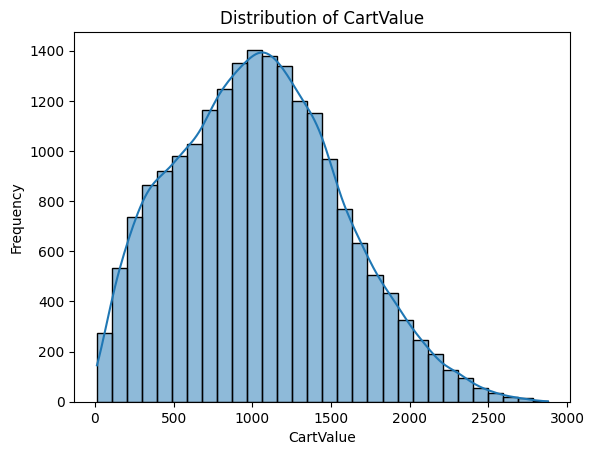

In [ ]:
sns.histplot(df_acme['CartValue'], bins=30, kde=True)
plt.title("Distribution of CartValue")
plt.xlabel("CartValue")
plt.ylabel("Frequency")
plt.show()

As we can observe, this distribution of our CartValue variable appears to be relatively normal with a right skew. Nothing appears to be totally abnormal, but let's just check the summary statistics of the CartValue column one more time just to be sure.

In [ ]:
df_acme['CartValue'].describe()

,CartValue
count,20000.000000
mean,1043.902090
std,521.023912
min,13.073600
25%,652.809100
50%,1030.538800
75%,1397.122000
max,2877.781800


Nothing appears off with this data, so we're ready to move to the next step of our analysis.

### Cleaning/Filtering the Data

As mentioned previously, this dataset is actually very clean and almost ready to go. The only thing I'll be doing in this stage is encoding all the variables to the correct types, essentially just preparing them so that they fit better during the modeling process.

In [ ]:
# Dummy encoding specified columns
dummy_encoded_df = pd.get_dummies(df_acme, columns=['DeviceUsed', 'CategoryVisited', 'ReferralSource', 'PreferredPaymentMethod', 'Segment', 'State'],
                                 drop_first=True)

dummy_encoded_df.head()

,CustomerID,Gender,AgeGroup,NumPagesViewed,CartValue,DiscountApplied,DiscountAmount,PurchaseMade,YearsOfMembership,LoyaltyPoints,...,PreferredPaymentMethod_Credit Card,PreferredPaymentMethod_Debit Card,PreferredPaymentMethod_PayPal,Segment_Corporate,Segment_Home Office,State_California,State_Florida,State_New York,State_Ohio,State_Texas
0,AA-08870,Male,55-64,6,264.2371,No,0.0,Yes,5,1945,...,False,False,True,False,True,False,True,False,False,False
1,AA-12676,Male,65+,7,1596.3232,Yes,0.1,No,6,1179,...,True,False,False,False,True,True,False,False,False,False
2,AA-17187,Female,18-24,15,1491.0912,Yes,0.3,No,10,490,...,False,False,True,False,False,False,False,False,False,True
3,AA-17917,Female,18-24,4,177.1260,Yes,0.1,No,7,2235,...,False,True,False,False,True,False,False,False,True,False
4,AA-20050,Male,65+,19,1885.3756,No,0.0,Yes,3,2844,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Replace True/False with 1/0 in the dummy encoded columns
for column in ['DeviceUsed_Mobile', 'DeviceUsed_Tablet', 'DeviceUsed_Laptop', 'CategoryVisited_Technology',
               'CategoryVisited_Home Supplies', 'ReferralSource_Social Media',
               'ReferralSource_Search Engine', 'ReferralSource_Email', 'PreferredPaymentMethod_Credit Card', 'PreferredPaymentMethod_Debit Card',
               'PreferredPaymentMethod_PayPal', 'Segment_Corporate', 'Segment_Home Office', 'State_California', 'State_Florida', 'State_New York', 'State_Ohio', 'State_Texas', ]:

  dummy_encoded_df[column] = dummy_encoded_df[column].astype(int)

dummy_encoded_df.head()

,CustomerID,Gender,AgeGroup,NumPagesViewed,CartValue,DiscountApplied,DiscountAmount,PurchaseMade,YearsOfMembership,LoyaltyPoints,...,PreferredPaymentMethod_Credit Card,PreferredPaymentMethod_Debit Card,PreferredPaymentMethod_PayPal,Segment_Corporate,Segment_Home Office,State_California,State_Florida,State_New York,State_Ohio,State_Texas
0,AA-08870,Male,55-64,6,264.2371,No,0.0,Yes,5,1945,...,0,0,1,0,1,0,1,0,0,0
1,AA-12676,Male,65+,7,1596.3232,Yes,0.1,No,6,1179,...,1,0,0,0,1,1,0,0,0,0
2,AA-17187,Female,18-24,15,1491.0912,Yes,0.3,No,10,490,...,0,0,1,0,0,0,0,0,0,1
3,AA-17917,Female,18-24,4,177.1260,Yes,0.1,No,7,2235,...,0,1,0,0,1,0,0,0,1,0
4,AA-20050,Male,65+,19,1885.3756,No,0.0,Yes,3,2844,...,0,0,0,0,1,0,0,0,0,0


Now, we'll convert all variables with only two outcomes into binary variables, where 1 represents Male/True, and 0 represents Female/False.

In [ ]:
# Convert 'Gender' and 'PurchaseMade' to binary variables
dummy_encoded_df['Gender'] = (dummy_encoded_df['Gender'] == 'Male').astype(int)
dummy_encoded_df['PurchaseMade'] = (dummy_encoded_df['PurchaseMade'] == 'Yes').astype(int)
dummy_encoded_df['DiscountApplied'] = (dummy_encoded_df['DiscountApplied'] == 'Yes').astype(int)

dummy_encoded_df.head()

,CustomerID,Gender,AgeGroup,NumPagesViewed,CartValue,DiscountApplied,DiscountAmount,PurchaseMade,YearsOfMembership,LoyaltyPoints,...,PreferredPaymentMethod_Credit Card,PreferredPaymentMethod_Debit Card,PreferredPaymentMethod_PayPal,Segment_Corporate,Segment_Home Office,State_California,State_Florida,State_New York,State_Ohio,State_Texas
0,AA-08870,1,55-64,6,264.2371,0,0.0,1,5,1945,...,0,0,1,0,1,0,1,0,0,0
1,AA-12676,1,65+,7,1596.3232,1,0.1,0,6,1179,...,1,0,0,0,1,1,0,0,0,0
2,AA-17187,0,18-24,15,1491.0912,1,0.3,0,10,490,...,0,0,1,0,0,0,0,0,0,1
3,AA-17917,0,18-24,4,177.1260,1,0.1,0,7,2235,...,0,1,0,0,1,0,0,0,1,0
4,AA-20050,1,65+,19,1885.3756,0,0.0,1,3,2844,...,0,0,0,0,1,0,0,0,0,0


Now, the only thing we have left to do is map and order our ordinal categorical variables (AgeGroup and LoyaltyTier). This is because while these variables are categorical, there is a clear hierarchical structure and way that they might affect our model.

In [ ]:
# Defining the mapping for AgeGroup
age_group_mapping = {
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65+': 6
}

# Applying the mapping to the AgeGroup column
dummy_encoded_df['AgeGroup'] = dummy_encoded_df['AgeGroup'].map(age_group_mapping)

# Defining the mapping for LoyaltyTier
loyalty_tier_mapping = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}

# Applying the mapping to the LoyaltyTier column
dummy_encoded_df['LoyaltyTier'] = dummy_encoded_df['LoyaltyTier'].map(loyalty_tier_mapping)

dummy_encoded_df.head()

,CustomerID,Gender,AgeGroup,NumPagesViewed,CartValue,DiscountApplied,DiscountAmount,PurchaseMade,YearsOfMembership,LoyaltyPoints,...,PreferredPaymentMethod_Credit Card,PreferredPaymentMethod_Debit Card,PreferredPaymentMethod_PayPal,Segment_Corporate,Segment_Home Office,State_California,State_Florida,State_New York,State_Ohio,State_Texas
0,AA-08870,1,5,6,264.2371,0,0.0,1,5,1945,...,0,0,1,0,1,0,1,0,0,0
1,AA-12676,1,6,7,1596.3232,1,0.1,0,6,1179,...,1,0,0,0,1,1,0,0,0,0
2,AA-17187,0,1,15,1491.0912,1,0.3,0,10,490,...,0,0,1,0,0,0,0,0,0,1
3,AA-17917,0,1,4,177.1260,1,0.1,0,7,2235,...,0,1,0,0,1,0,0,0,1,0
4,AA-20050,1,6,19,1885.3756,0,0.0,1,3,2844,...,0,0,0,0,1,0,0,0,0,0


Now, our data is entirely numerical and should be ready to accurately model!

## Step 4: Model Creation

We have already determined that PurchaseMade will be our target variable (what we're trying to predict). Now we must come up with a list of predictor variables that we'll be training our model with.

We also must choose the types of models that we'll be building.

A decision tree model seems like a good choice for us, given that it is a simple, easy-to-interpret model that will work well for this kind of 'yes or no' classification request.

I will also be doing a random forest model. The random forest model is similar to a decision tree, although it goes much deeper to find patterns in the data. I think that a random forest model will give us the most accurate results and allow us to clearly understand which types of customers are and are not buying from us, allowing us to strategize further on how we can expand our market.

In [ ]:
# Creating the list of predictors
x = dummy_encoded_df.drop('PurchaseMade', axis=1)
y = dummy_encoded_df['PurchaseMade']

# Dropping any variables that will not help us predict PurchaseMade
x = x.drop('CustomerID', axis=1)
x = x.drop('MalePurchase', axis=1)
x = x.drop('FemalePurchase', axis=1)

In [ ]:
for var_name in x:
  print(var_name)

Gender
AgeGroup
NumPagesViewed
CartValue
DiscountApplied
DiscountAmount
YearsOfMembership
LoyaltyPoints
LoyaltyTier
DeviceUsed_Laptop
DeviceUsed_Mobile
DeviceUsed_Tablet
CategoryVisited_Home Supplies
CategoryVisited_Technology
ReferralSource_Email
ReferralSource_Search Engine
ReferralSource_Social Media
PreferredPaymentMethod_Credit Card
PreferredPaymentMethod_Debit Card
PreferredPaymentMethod_PayPal
Segment_Corporate
Segment_Home Office
State_California
State_Florida
State_New York
State_Ohio
State_Texas


Now, we will begin the creation of our models.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

# Creating Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

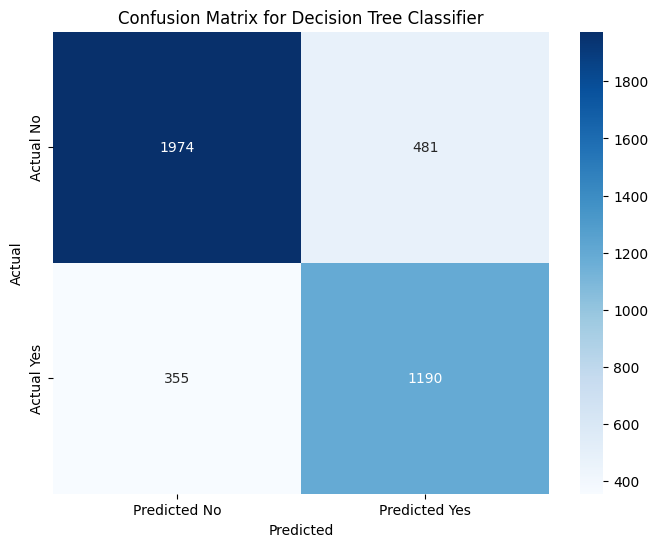

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = dt_classifier.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy}")


Accuracy of the Decision Tree Classifier: 0.791


Here is the results of our first model! The decision tree model correctly predicted 1974 No's while incorrectly predicting 'yes' for 481 'No's'. The model predicted 1190 correct "yes's" and 355 false yes's for actual "no's". This gives an accuracy of 0.791 which is quite good, but we'd like to be more precise ideally, in order to get an even better understanding of our customer base.

Accuracy alone doesn't tell us the full story though. Let's take a look at a few other metrics.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

F1 Score: 0.7400497512437811
Precision: 0.7121484141232794
Recall: 0.7702265372168284


Here we can see that all of the F1, Precision, and Recall scores are in the low 70's, meaning that they're not all that accurate, and we should ideally look for an alternative model to base our understanding on.

Now, let's continue on to our next model.

Random Forest Accuracy: 0.86075


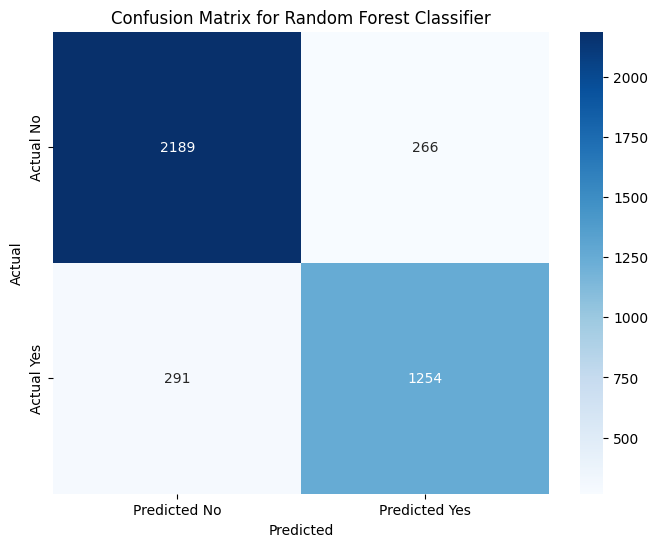

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest Model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(x_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Creating the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

As we can see, the model correctly predicted 2189 No's and 1254 Yes's. This gives us a random forest accuracy of 0.861 which is quite good, and should provide us with a reasonably accurate understanding of our typical consumers. Once again, let's take a look at some deeper metrics to be sure that this model is helpful to us.

In [ ]:
# Calculating F1 score for rf_classifier
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1 Score: {f1_rf}")

# Calculate precision for rf_classifier
precision_rf = precision_score(y_test, y_pred_rf)
print(f"Random Forest Precision: {precision_rf}")

# Calculate recall for rf_classifier
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest Recall: {recall_rf}")

These are all in the .80's, meaning that they're far more reliable than our decision tree model and we can move forward with this.

## Step 5: Analysis and Conclusion

Since we've determined that the random forest model is the best of the two, we should make a visual to better understand the decision making process of this model.

[Text(0.5, 0.875, 'NumPagesViewed <= 10.5\ngini = 0.484\nsamples = 10125\nvalue = [9416, 6584]'),
 Text(0.25, 0.625, 'PreferredPaymentMethod_PayPal <= 0.5\ngini = 0.281\nsamples = 5241\nvalue = [6859, 1397]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'DiscountApplied <= 0.5\ngini = 0.289\nsamples = 3875\nvalue = [5039, 1072]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NumPagesViewed <= 5.5\ngini = 0.257\nsamples = 1366\nvalue = [1820, 325]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'LoyaltyPoints <= 2866.5\ngini = 0.442\nsamples = 4884\nvalue = [2557, 5187]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'State_Ohio <= 0.5\ngini = 0.468\nsamples = 3164\nvalue = [1865.0, 3130.0]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumPagesViewed <= 15.5\ngini = 0.377\nsamples = 1720\nvalue = [692.0, 2057.0]'),


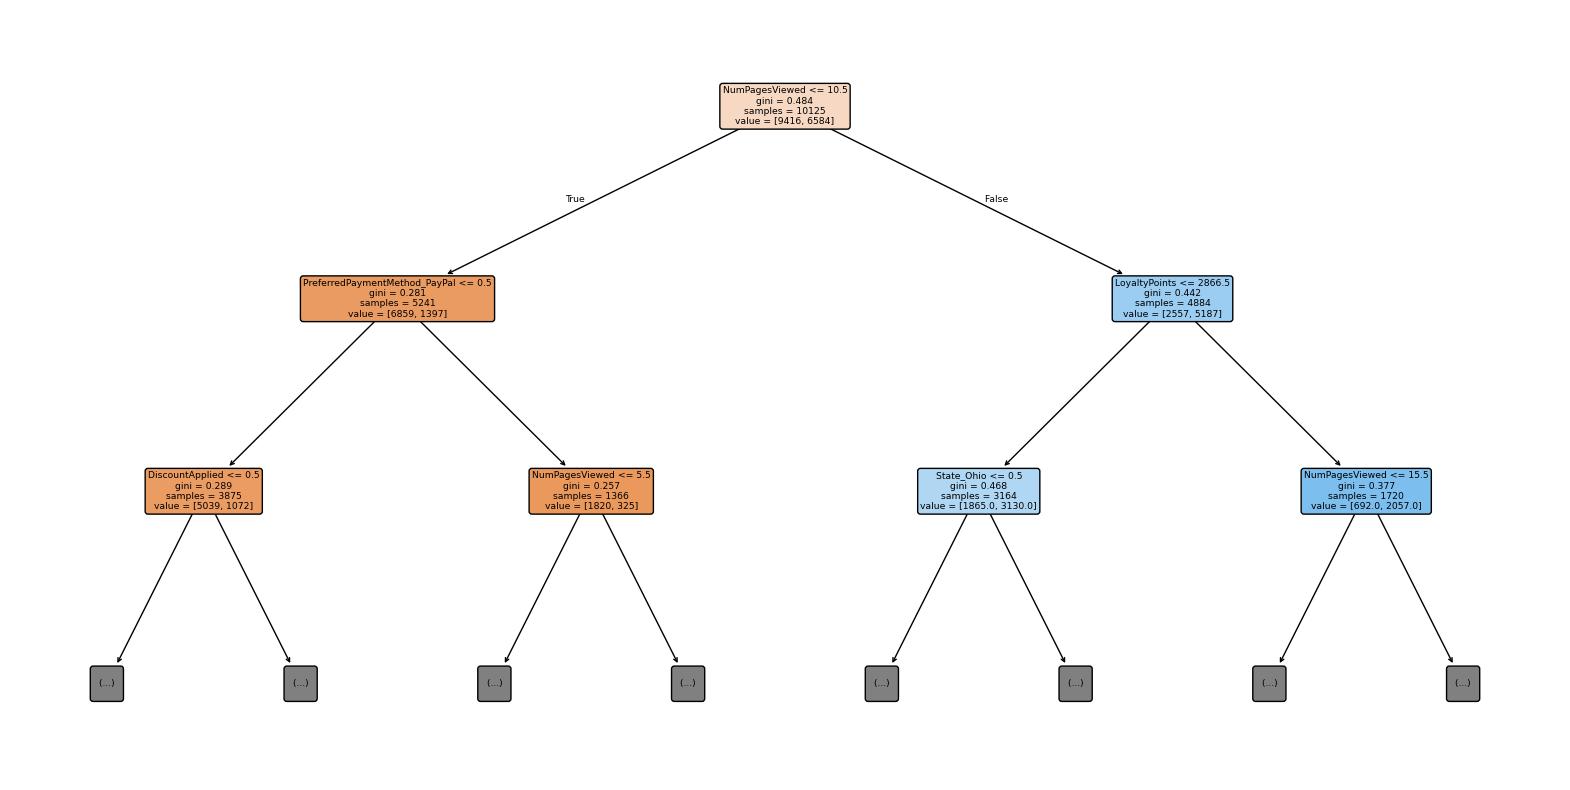

In [ ]:
from sklearn.tree import plot_tree

# Creating a visual to model our random forest model
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], feature_names=x.columns, filled=True, rounded=True, max_depth=2)

Essentially, this tree visual tells us that NumPagesViewed is the most important variable to determining whether or not a customer buys from us. If a customer views more than 10 pages, they are overwhelmingly more likely to buy a product from us.

Therefore, in order to best increase our profits as a company, I suggest we look at how to increase the amount of time spent and subsequently, the number of pages that are viewed on our website.


# Final Conclusion

For our first request, we found through the linear regression model that our projected sales and profits are projected to go up through the final quarter of 2024. This is true across all categories and products that we sell, likely due to the holiday season creating an economic boost.

Based on this finding, it might be beneificial for the company to look at ways that we could keep sales up throughout the winter, perhaps with some sort of deal or campaign to increase user actvitiy during this time of year.

For our second request, we found that the random forest classifier was the more useful model, which essentially told us that while the majority of website visitors do not purchase from us, the visitors who visit a high number of pages are far more likely to.

Using this information, perhaps making a change to our website to make it more engaging would be a good strategy to increase profits going forward. Refining the user experience will lead to more time spent on our site and subsequently, a greater chance of purchasing.

Thank you for listening and hope you appreciate the insights!